# 02.5 Overall Health by State - Linear Regressions

1. Imports and display options
1. Data prep
1. Linear regressions
1. Conclusion

## 1. Imports and display options

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Creating a path to the root directory for this project

path = r'C:\Users\theva\Documents\Data Analyses\BRFSS'

In [3]:
#Importing products.csv to df_prods
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'BRFSS Overall Health by State TABLEAU.pkl'))

In [4]:
#Checking df

df.shape

(385, 35)

In [5]:
#Checking df

df.head()

location  year  BMI: Obese (BMI 30.0 - 99.8)  \
0  Alabama  2015                          35.6   
1  Alabama  2016                          35.7   
2  Alabama  2017                          36.3   
3  Alabama  2018                          36.2   
4  Alabama  2019                          36.1   

   BMI: Overweight (BMI 25.0-29.9)  BMI: Normal Weight (BMI 18.5-24.9)  \
0                             33.0                                28.9   
1                             33.8                                28.4   
2                             33.9                                28.5   
3                             33.4                                28.4   
4                             34.2                                27.5   

   BMI: Underweight (BMI 12.0-18.4)  General health: Excellent  \
0                               2.4                       16.2   
1                               2.1                       15.2   
2                               1.3                       15.4   
3                               2.0                       14.5   
4                               2.2                       15.4   

   General health: Very good  General health: Good  General health: Fair  ...  \
0                       29.1                  32.5                  15.2  ...   
1                       29.8                  32.5                  15.7  ...   
2                       28.2                  33.1                  16.2  ...   
3                       28.6                  34.0                  15.7  ...   
4                       29.5                  32.4                  16.2  ...   

   Vegetables eaten: Daily  Vegetables eaten: Not daily  \
0                     72.2                         27.8   
1                      NaN                          NaN   
2                     80.7                         19.3   
3                      NaN                          NaN   
4                     77.7                         22.3   

   Aerobic activity per week: Over 150 min  \
0                                     44.6   
1                                      NaN   
2                                     42.8   
3                                      NaN   
4                                     44.8   

   Aerobic activity per week: Under 150 min  \
0                                      55.4   
1                                       NaN   
2                                      57.2   
3                                       NaN   
4                                      55.2   

   Met physical activity guidelines: Yes  \
0                                   16.7   
1                                    NaN   
2                                   16.1   
3                                    NaN   
4                                   17.6   

   Met physical activity guidelines: No  Strength training: 2x+ per week  \
0                                  83.3                             25.8   
1                                   NaN                              NaN   
2                                  83.9                             26.0   
3                                   NaN                              NaN   
4                                  82.4                             29.2   

   Strength training: 1x- per week  Physically active in last month: Yes  \
0                             74.2                                  68.1   
1                              NaN                                  70.6   
2                             74.0                                  68.0   
3                              NaN                                  69.3   
4                             70.8                                  68.5   

   Physically active in last month: No  
0                                 31.9  
1                                 29.4  
2                                 32.0  
3                                 30.7  
4                                 31.5  

[5 rows x 35 columns]

In [6]:
#Adjusting display settings

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

%matplotlib inline
sns.set()

# 2. Data prep

In [7]:
# Dropping national averages to remove redundant information.

df = df.loc[(df['location'] != 'All States and DC (median) **') &
            (df['location'] != 'All States, DC and Territories (median) **')]

In [8]:
# Getting column names

df.columns

Index(['location', 'year', 'BMI: Obese (BMI 30.0 - 99.8)',
       'BMI: Overweight (BMI 25.0-29.9)', 'BMI: Normal Weight (BMI 18.5-24.9)',
       'BMI: Underweight (BMI 12.0-18.4)', 'General health: Excellent',
       'General health: Very good', 'General health: Good',
       'General health: Fair', 'General health: Poor',
       'Health status: Good or Better', 'Health status: Fair or Poor',
       'Doc visit: Past year', 'Doc visit: Past 2 years',
       'Doc visit: Past 5 years', 'Doc visit: 5+ years ago',
       'Doc visit: Never', 'Concentrate, remember, decide: Difficult',
       'Concentrate, remember, decide: Not difficult',
       'Bad mental health days: 0', 'Bad mental health days: 1-13',
       'Bad mental health days: 14+', 'Fruit eaten: Daily',
       'Fruit eaten: Not daily', 'Vegetables eaten: Daily',
       'Vegetables eaten: Not daily',
       'Aerobic activity per week: Over 150 min',
       'Aerobic activity per week: Under 150 min',
       'Met physical activity g

In [9]:
# Dropping calculated health statuses and negative response to binary question pairs, 
# i.e.: keeping 'Fruit eaten: Daily' and dropping 'Fruit eaten: Not daily'.

df.drop(columns=['location',
                 'Health status: Good or Better',
                 'Health status: Fair or Poor',
                 'Concentrate, remember, decide: Not difficult',
                 'Fruit eaten: Not daily',
                 'Vegetables eaten: Not daily',
                 'Aerobic activity per week: Under 150 min',
                 'Met physical activity guidelines: No',
                 'Strength training: 1x- per week',
                 'Physically active in last month: No'], inplace=True)

In [10]:
#Checking changes

df.head()

year  BMI: Obese (BMI 30.0 - 99.8)  BMI: Overweight (BMI 25.0-29.9)  \
0  2015                          35.6                             33.0   
1  2016                          35.7                             33.8   
2  2017                          36.3                             33.9   
3  2018                          36.2                             33.4   
4  2019                          36.1                             34.2   

   BMI: Normal Weight (BMI 18.5-24.9)  BMI: Underweight (BMI 12.0-18.4)  \
0                                28.9                               2.4   
1                                28.4                               2.1   
2                                28.5                               1.3   
3                                28.4                               2.0   
4                                27.5                               2.2   

   General health: Excellent  General health: Very good  General health: Good  \
0                       16.2                       29.1                  32.5   
1                       15.2                       29.8                  32.5   
2                       15.4                       28.2                  33.1   
3                       14.5                       28.6                  34.0   
4                       15.4                       29.5                  32.4   

   General health: Fair  General health: Poor  ...  \
0                  15.2                   7.0  ...   
1                  15.7                   6.9  ...   
2                  16.2                   7.1  ...   
3                  15.7                   7.2  ...   
4                  16.2                   6.5  ...   

   Concentrate, remember, decide: Difficult  Bad mental health days: 0  \
0                                      15.0                        NaN   
1                                      14.3                        NaN   
2                                      15.8                        NaN   
3                                      15.8                        NaN   
4                                      16.7                       58.0   

   Bad mental health days: 1-13  Bad mental health days: 14+  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                          24.5                         17.5   

   Fruit eaten: Daily  Vegetables eaten: Daily  \
0                51.7                     72.2   
1                 NaN                      NaN   
2                55.2                     80.7   
3                 NaN                      NaN   
4                53.9                     77.7   

   Aerobic activity per week: Over 150 min  \
0                                     44.6   
1                                      NaN   
2                                     42.8   
3                                      NaN   
4                                     44.8   

   Met physical activity guidelines: Yes  Strength training: 2x+ per week  \
0                                   16.7                             25.8   
1                                    NaN                              NaN   
2                                   16.1                             26.0   
3                                    NaN                              NaN   
4                                   17.6                             29.2   

   Physically active in last month: Yes  
0                                  68.1  
1                                  70.6  
2                                  68.0  
3                                  69.3  
4                                  68.5  

[5 rows x 25 columns]

In [11]:
# Checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 370
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      371 non-null    int64  
 1   BMI: Obese (BMI 30.0 - 99.8)              371 non-null    float64
 2   BMI: Overweight (BMI 25.0-29.9)           371 non-null    float64
 3   BMI: Normal Weight (BMI 18.5-24.9)        371 non-null    float64
 4   BMI: Underweight (BMI 12.0-18.4)          367 non-null    float64
 5   General health: Excellent                 371 non-null    float64
 6   General health: Very good                 371 non-null    float64
 7   General health: Good                      371 non-null    float64
 8   General health: Fair                      371 non-null    float64
 9   General health: Poor                      371 non-null    float64
 10  Doc visit: Past year                  

In [12]:
# Checking changes

df.head(20)

year  BMI: Obese (BMI 30.0 - 99.8)  BMI: Overweight (BMI 25.0-29.9)  \
0   2015                          35.6                             33.0   
1   2016                          35.7                             33.8   
2   2017                          36.3                             33.9   
3   2018                          36.2                             33.4   
4   2019                          36.1                             34.2   
5   2020                          39.0                             33.7   
6   2021                          39.9                             31.9   
7   2015                          29.7                             37.2   
8   2016                          30.7                             37.3   
9   2017                          31.8                             36.7   
10  2018                          33.5                             34.3   
11  2019                          34.4                             34.5   
12  2020                          36.5                             32.1   
13  2021                          33.9                             34.9   
14  2015                          22.1                             32.2   
15  2016                          22.6                             30.8   
16  2017                          22.9                             31.2   
17  2018                          24.7                             31.1   
18  2019                          23.8                             32.1   
19  2020                          24.3                             33.0   

    BMI: Normal Weight (BMI 18.5-24.9)  BMI: Underweight (BMI 12.0-18.4)  \
0                                 28.9                               2.4   
1                                 28.4                               2.1   
2                                 28.5                               1.3   
3                                 28.4                               2.0   
4                                 27.5                               2.2   
5                                 25.4                               1.8   
6                                 26.4                               1.8   
7                                 31.7                               1.4   
8                                 30.2                               1.8   
9                                 29.5                               2.0   
10                                30.6                               1.6   
11                                29.4                               1.7   
12                                29.2                               2.1   
13                                29.4                               1.9   
14                                43.5                               2.1   
15                                44.4                               2.2   
16                                43.5                               2.4   
17                                41.8                               2.4   
18                                42.4                               1.7   
19                                40.8                               1.9   

    General health: Excellent  General health: Very good  \
0                        16.2                       29.1   
1                        15.2                       29.8   
2                        15.4                       28.2   
3                        14.5                       28.6   
4                        15.4                       29.5   
5                        17.6                       30.0   
6                        15.2                       30.8   
7                        18.6                       33.2   
8                        19.2                       33.8   
9                        16.8                       31.0   
10                       18.4                       32.2   
11                       17.6                       31.6   
12                       20.5                      

In [13]:
# Making a correlation matrix so I can plot just strong correlations

corrs = df.corr()
corrs

year  \
year                                      1.000000   
BMI: Obese (BMI 30.0 - 99.8)              0.325689   
BMI: Overweight (BMI 25.0-29.9)          -0.263868   
BMI: Normal Weight (BMI 18.5-24.9)       -0.267435   
BMI: Underweight (BMI 12.0-18.4)          0.029964   
General health: Excellent                 0.200750   
General health: Very good                 0.081953   
General health: Good                     -0.086747   
General health: Fair                     -0.122721   
General health: Poor                     -0.236423   
Doc visit: Past year                      0.368654   
Doc visit: Past 2 years                  -0.037187   
Doc visit: Past 5 years                  -0.403735   
Doc visit: 5+ years ago                  -0.440244   
Doc visit: Never                         -0.412044   
Concentrate, remember, decide: Difficult  0.228706   
Bad mental health days: 0                -0.160242   
Bad mental health days: 1-13              0.095227   
Bad mental health days: 14+               0.179699   
Fruit eaten: Daily                       -0.046130   
Vegetables eaten: Daily                   0.094670   
Aerobic activity per week: Over 150 min  -0.074399   
Met physical activity guidelines: Yes     0.229031   
Strength training: 2x+ per week           0.412712   
Physically active in last month: Yes      0.103127   

                                          BMI: Obese (BMI 30.0 - 99.8)  \
year                                                          0.325689   
BMI: Obese (BMI 30.0 - 99.8)                                  1.000000   
BMI: Overweight (BMI 25.0-29.9)                              -0.450781   
BMI: Normal Weight (BMI 18.5-24.9)                           -0.935347   
BMI: Underweight (BMI 12.0-18.4)                             -0.237259   
General health: Excellent                                    -0.572027   
General health: Very good                                    -0.282873   
General health: Good                                          0.384092   
General health: Fair                                          0.381786   
General health: Poor                                          0.508218   
Doc visit: Past year                                          0.253473   
Doc visit: Past 2 years                                      -0.427913   
Doc visit: Past 5 years                                      -0.271853   
Doc visit: 5+ years ago                                       0.022636   
Doc visit: Never                                             -0.127010   
Concentrate, remember, decide: Difficult                      0.615905   
Bad mental health days: 0                                     0.042773   
Bad mental health days: 1-13                                 -0.335352   
Bad mental health days: 14+                                   0.488944   
Fruit eaten: Daily                                           -0.631581   
Vegetables eaten: Daily                                      -0.250785   
Aerobic activity per week: Over 150 min                      -0.606930   
Met physical activity guidelines: Yes                        -0.529572   
Strength training: 2x+ per week                              -0.332199   
Physically active in last month: Yes                         -0.501806   

                                          BMI: Overweight (BMI 25.0-29.9)  \
year                                                            -0.263868   
BMI: Obese (BMI 30.0 - 99.8)                                    -0.450781   
BMI: Overweight (BMI 25.0-29.9)                                  1.000000   
BMI: Normal Weight (BMI 18.5-24.9)                               0.117113   
BMI: Underweight (BMI 12.0-18.4)                                -0.145991   
General health: Excellent                                        0.195338   
General health: Very good                                        0.076519   
General health: Good                                            -0.093400   
General health: Fair   

In [14]:
# Making the correlation matric boolean so all moderate and strong
# correlations are True.

for indices, row in corrs.iterrows():
    for col in corrs.columns:
        if abs(corrs.at[indices,col]) >= 0.5:
            corrs.at[indices,col] = True
        else:
            corrs.at[indices,col] = False
            
corrs

year BMI: Obese (BMI 30.0 - 99.8)  \
year                                       True                        False   
BMI: Obese (BMI 30.0 - 99.8)              False                         True   
BMI: Overweight (BMI 25.0-29.9)           False                        False   
BMI: Normal Weight (BMI 18.5-24.9)        False                         True   
BMI: Underweight (BMI 12.0-18.4)          False                        False   
General health: Excellent                 False                         True   
General health: Very good                 False                        False   
General health: Good                      False                        False   
General health: Fair                      False                        False   
General health: Poor                      False                         True   
Doc visit: Past year                      False                        False   
Doc visit: Past 2 years                   False                        False   
Doc visit: Past 5 years                   False                        False   
Doc visit: 5+ years ago                   False                        False   
Doc visit: Never                          False                        False   
Concentrate, remember, decide: Difficult  False                         True   
Bad mental health days: 0                 False                        False   
Bad mental health days: 1-13              False                        False   
Bad mental health days: 14+               False                        False   
Fruit eaten: Daily                        False                         True   
Vegetables eaten: Daily                   False                        False   
Aerobic activity per week: Over 150 min   False                         True   
Met physical activity guidelines: Yes     False                         True   
Strength training: 2x+ per week           False                        False   
Physically active in last month: Yes      False                         True   

                                         BMI: Overweight (BMI 25.0-29.9)  \
year                                                               False   
BMI: Obese (BMI 30.0 - 99.8)                                       False   
BMI: Overweight (BMI 25.0-29.9)                                     True   
BMI: Normal Weight (BMI 18.5-24.9)                                 False   
BMI: Underweight (BMI 12.0-18.4)                                   False   
General health: Excellent                                          False   
General health: Very good                                          False   
General health: Good                                               False   
General health: Fair                                               False   
General health: Poor                                               False   
Doc visit: Past year                                               False   
Doc visit: Past 2 years                                            False   
Doc visit: Past 5 years                                            False   
Doc visit: 5+ years ago                                            False   
Doc visit: Never                                                   False   
Concentrate, remember, decide: Difficult                           False   
Bad mental health days: 0                                          False   
Bad mental health days: 1-13                                       False   
Bad mental health days: 14+                                        False   
Fruit eaten: Daily                                                 False   
Vegetables eaten: Daily                                            False   
Aerobic activity per week: Over 150 min                            False   
Met physical activity guidelines: Yes                              False   
Strength training: 2x+ per week                                    False   
Physically active in last month: Yes                          

# 3. Linear regressions

### 3.1 Defining functions

In [17]:
# This function will print the regression statistics for a variable
# against a list of variables.

def reg_stats(x_name, y_list, threshold):
    for i in range(0,len(y_list)): # making for loop to run through y_list
        
        y_name = y_list[i] # Defining y_name variable from y_list iteration
        
        df_temp = df[[x_name, y_name]].copy() # Creating a temporary dataframe
        df_temp.dropna(inplace = True) # Cleaning the temporary data frame
        
        # Reshape the variables into NumPy arrays and put them into separate objects.
        X = df_temp[x_name].values.reshape(-1,1)
        y = df_temp[y_name].values.reshape(-1,1)
        
        # Split data into a training set and a test set.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        # Create a regression object.
        regression = LinearRegression()

        # Fit the regression object onto the training set.
        regression.fit(X_train, y_train)

        # Predict the values of y using X.
        y_predicted = regression.predict(X_test)
        
        # Creating objects that contain the model summary statistics.
        rmse = mean_squared_error(y_test, y_predicted, squared = False)
        r2 = r2_score(y_test, y_predicted)

        # Printing the model summary statistics with r2s above threshold.
        if r2 > threshold:
            print(x_name+' vs '+y_name)
            print('Slope:', regression.coef_)
            print('RMSE: ', round(rmse, 3))
            print('R2 score: ', round(r2, 3), '\n\n')        

In [18]:
# This function will plot a linear regression and print its statistics
# of a variable against a list of variables.

def reg_plot(x_name, y_list, threshold):
    for i in range(0,len(y_list)): # Making for loop to run through y_list
        
        y_name = y_list[i] # Defining y_name variable from y_list iteration
        
        df_temp = df[[x_name, y_name]].copy() # Creating a temporary dataframe
        df_temp.dropna(inplace = True) # Cleaning the temporary data frame
        
        # Reshape the variables into NumPy arrays and put them into separate objects.
        X = df_temp[x_name].values.reshape(-1,1)
        y = df_temp[y_name].values.reshape(-1,1)
        
        # Split data into a training set and a test set.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        # Create a regression object.
        regression = LinearRegression()

        # Fit the regression object onto the training set.
        regression.fit(X_train, y_train)

        # Predict the values of y using X.
        y_predicted = regression.predict(X_test)
        
        # Creating objects that contain the model summary statistics.
        rmse = mean_squared_error(y_test, y_predicted, squared = False)
        r2 = r2_score(y_test, y_predicted)

        # Printing the model summary statistics with r2s above threshold.
        if r2 > threshold:
            
            # plotting the linear regression
            plot_test = plt
            plot_test.scatter(X_test, y_test, color='gray', s = 15)
            plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
            plot_test.title(str(x_name+' vs '+y_name))
            plot_test.xlabel(x_name)
            plot_test.ylabel(y_name)
            plot_test.show()

            #Printing the regression statistics
            print(x_name+' vs '+y_name)
            print('Slope:', regression.coef_)
            print('RMSE: ', round(rmse, 3))
            print('R2 score: ', round(r2, 3), '\n\n')        

### 3.2 R2 scores above 0.5

In [19]:
# Testing all variables for r2 scores above 0.5

for col in df.columns:
    x_name = col
    y_list = df.columns.tolist()
    y_list = [r for r in y_list if r != x_name]
        
    reg_stats(x_name, y_list, 0.5)

BMI: Obese (BMI 30.0 - 99.8) vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[-0.80434545]]
RMSE:  1.419
R2 score:  0.854 


BMI: Normal Weight (BMI 18.5-24.9) vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[-1.09964372]]
RMSE:  1.575
R2 score:  0.849 


General health: Very good vs General health: Fair
Slope: [[-0.70124665]]
RMSE:  1.211
R2 score:  0.816 


General health: Very good vs Physically active in last month: Yes
Slope: [[0.95075587]]
RMSE:  3.162
R2 score:  0.597 


General health: Fair vs General health: Very good
Slope: [[-1.15190045]]
RMSE:  1.595
R2 score:  0.81 


General health: Fair vs Physically active in last month: Yes
Slope: [[-1.34213434]]
RMSE:  2.902
R2 score:  0.66 


Doc visit: Past year vs Doc visit: Past 2 years
Slope: [[-0.2720913]]
RMSE:  1.575
R2 score:  0.508 


Doc visit: Past year vs Doc visit: Past 5 years
Slope: [[-0.31344095]]
RMSE:  0.563
R2 score:  0.887 


Doc visit: Past year vs Doc visit: 5+ years ago
Slope: [[-0.35585445]]
RMSE:  1.302
R2 score:  0.60

<div class='alert alert-block alert-info'>
    Most results are comparing variables against other variables in the same category and will be ignored - i.e., BMI: Obese (BMI 30.0 - 99.8) vs BMI: Normal Weight (BMI 18.5-24.9) are both in the BMI category and their results are meaningless.<br>
    <br>
    <b>Remaining strongest r2 score pairs:</b>
    <br>
    <br>
    <b>Bad mental health days: 14+ vs Concentrate, remember, decide: Difficult</b><br>
    Slope: [[0.82140366]]<br>
    RMSE:  1.345<br>
    R2 score:  0.711<br>
    <br>
    <b>Vegetables eaten: Daily vs Bad mental health days: 0</b><br>
    Slope: [[-0.48135346]]<br>
    RMSE:  3.223<br>
    R2 score:  0.52<br>
    <br>
    <b>Vegetables eaten: Daily vs Bad mental health days: 1-13</b>
    <br>Slope: [[0.43950877]]
    <br>RMSE:  2.233
    <br>R2 score:  0.627
    <br><br>
    <b>Physically active in last month: Yes vs General health: Very good</b>
    <br>Slope: [[0.5908902]]
    <br>RMSE:  2.341
    <br>R2 score:  0.591
    <br><br>
    <b>Physically active in last month: Yes vs General health: Fair</b>
    <br>Slope: [[-0.50779639]]
    <br>RMSE:  1.651
    <br>R2 score:  0.657
    <br><br>
    <em>According to George Choueiry, there is some ambiguity about a meaningful r-squared value in medical reserach (https://quantifyinghealth.com/r-squared-study/). Thus, more correlations will be explored.</em>
    </div>

### 3.3 Year
<div class="alert" style='background:#DCDCDC;color:#4D4D4D;padding:15px'>
    There are no strong correlations for year, thus no liner regressions will be performed at this time.
    </div>

### 3.4 BMI
<div class="alert" style='background:#DCDCDC;color:#4D4D4D;padding:15px'>
    There are no strong correlations for BMI: Overweight (BMI 25.0-29.9) or BMI: Underweight (BMI 12.0-18.4), thus no liner regressions will be performed for them at this time.
    </div>

In [22]:
# Making a subeset of the boolean correlation matrix for this category

index_list = ['BMI: Obese (BMI 30.0 - 99.8)',
              'BMI: Overweight (BMI 25.0-29.9)',
              'BMI: Normal Weight (BMI 18.5-24.9)',
              'BMI: Underweight (BMI 12.0-18.4)']

cat_corr = corrs[corrs.index.isin(index_list)] # Selecting the category's rows
cat_corr = cat_corr.drop(columns = index_list).copy() # dropping category's columns to reduce meaningless correlations
cat_corr

year General health: Excellent  \
BMI: Obese (BMI 30.0 - 99.8)        False                      True   
BMI: Overweight (BMI 25.0-29.9)     False                     False   
BMI: Normal Weight (BMI 18.5-24.9)  False                      True   
BMI: Underweight (BMI 12.0-18.4)    False                     False   

                                   General health: Very good  \
BMI: Obese (BMI 30.0 - 99.8)                           False   
BMI: Overweight (BMI 25.0-29.9)                        False   
BMI: Normal Weight (BMI 18.5-24.9)                     False   
BMI: Underweight (BMI 12.0-18.4)                       False   

                                   General health: Good General health: Fair  \
BMI: Obese (BMI 30.0 - 99.8)                      False                False   
BMI: Overweight (BMI 25.0-29.9)                   False                False   
BMI: Normal Weight (BMI 18.5-24.9)                False                False   
BMI: Underweight (BMI 12.0-18.4)                  False                False   

                                   General health: Poor Doc visit: Past year  \
BMI: Obese (BMI 30.0 - 99.8)                       True                False   
BMI: Overweight (BMI 25.0-29.9)                   False                False   
BMI: Normal Weight (BMI 18.5-24.9)                False                False   
BMI: Underweight (BMI 12.0-18.4)                  False                False   

                                   Doc visit: Past 2 years  \
BMI: Obese (BMI 30.0 - 99.8)                         False   
BMI: Overweight (BMI 25.0-29.9)                      False   
BMI: Normal Weight (BMI 18.5-24.9)                   False   
BMI: Underweight (BMI 12.0-18.4)                     False   

                                   Doc visit: Past 5 years  \
BMI: Obese (BMI 30.0 - 99.8)                         False   
BMI: Overweight (BMI 25.0-29.9)                      False   
BMI: Normal Weight (BMI 18.5-24.9)                   False   
BMI: Underweight (BMI 12.0-18.4)                     False   

                                   Doc visit: 5+ years ago  ...  \
BMI: Obese (BMI 30.0 - 99.8)                         False  ...   
BMI: Overweight (BMI 25.0-29.9)                      False  ...   
BMI: Normal Weight (BMI 18.5-24.9)                   False  ...   
BMI: Underweight (BMI 12.0-18.4)                     False  ...   

                                   Concentrate, remember, decide: Difficult  \
BMI: Obese (BMI 30.0 - 99.8)                                           True   
BMI: Overweight (BMI 25.0-29.9)                                       False   
BMI: Normal Weight (BMI 18.5-24.9)                                     True   
BMI: Underweight (BMI 12.0-18.4)                                      False   

                                   Bad mental health days: 0  \
BMI: Obese (BMI 30.0 - 99.8)                           False   
BMI: Overweight (BMI 25.0-29.9)                        False   
BMI: Normal Weight (BMI 18.5-24.9)                     False   
BMI: Underweight (BMI 12.0-18.4)                       False   

                                   Bad mental health days: 1-13  \
BMI: Obese (BMI 30.0 - 99.8)                              False   
BMI: Overweight (BMI 25.0-29.9)                           False   
BMI: Normal Weight (BMI 18.5-24.9)                        False   
BMI: Underweight (BMI 12.0-18.4)                          False   

                                   Bad mental health days: 14+  \
BMI: Obese (BMI 30.0 - 99.8)                             False   
BMI: Overweight (BMI 25.0-29.9)                          False   
BMI: Normal Weight (BMI 18.5-24.9)                       False   
BMI: Underweight (BMI 12.0-18.4)                         False   

                                   Fruit eaten: Daily Vegetables eaten: Daily  \
BMI: Obese (BMI 30.0 - 99.8)                     True                   False   
BMI: Overweight (BMI 25.0-29.9)                 False 

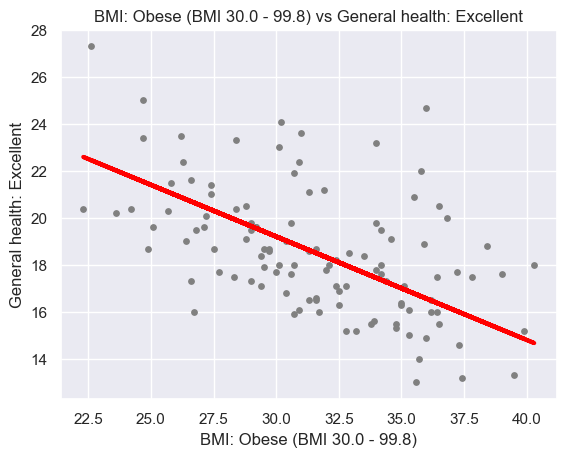

BMI: Obese (BMI 30.0 - 99.8) vs General health: Excellent
Slope: [[-0.44005815]]
RMSE:  2.331
R2 score:  0.245 




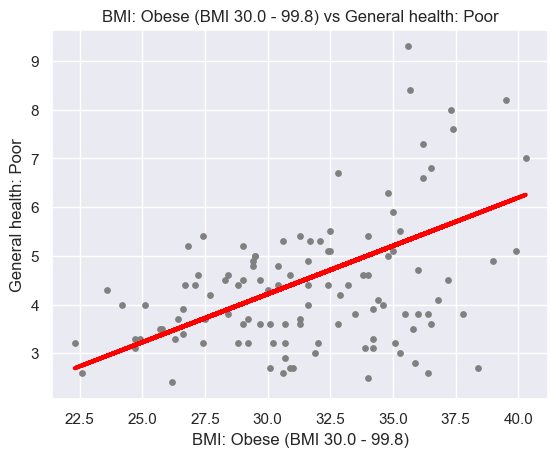

BMI: Obese (BMI 30.0 - 99.8) vs General health: Poor
Slope: [[0.19783046]]
RMSE:  1.275
R2 score:  0.091 




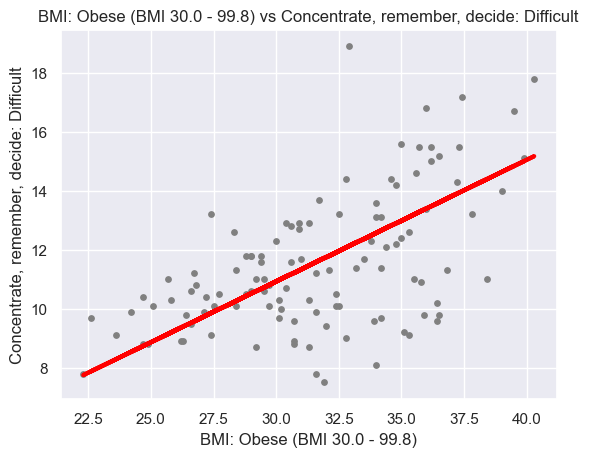

BMI: Obese (BMI 30.0 - 99.8) vs Concentrate, remember, decide: Difficult
Slope: [[0.41258887]]
RMSE:  1.954
R2 score:  0.279 




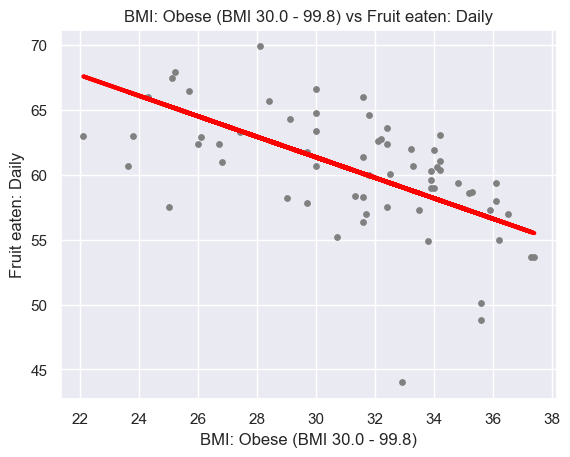

BMI: Obese (BMI 30.0 - 99.8) vs Fruit eaten: Daily
Slope: [[-0.78956232]]
RMSE:  3.806
R2 score:  0.287 




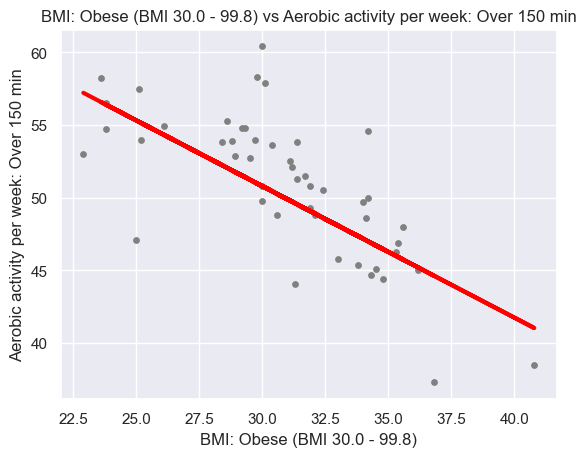

BMI: Obese (BMI 30.0 - 99.8) vs Aerobic activity per week: Over 150 min
Slope: [[-0.9034061]]
RMSE:  3.531
R2 score:  0.482 




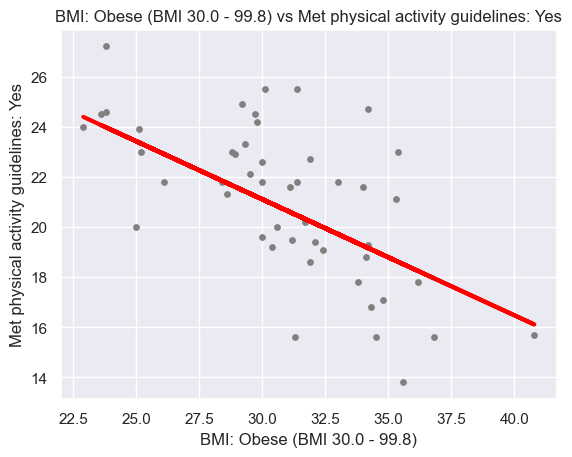

BMI: Obese (BMI 30.0 - 99.8) vs Met physical activity guidelines: Yes
Slope: [[-0.46237152]]
RMSE:  2.381
R2 score:  0.402 




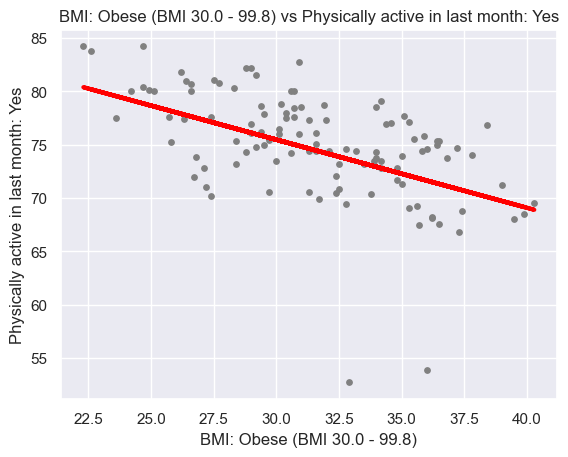

BMI: Obese (BMI 30.0 - 99.8) vs Physically active in last month: Yes
Slope: [[-0.63836049]]
RMSE:  4.189
R2 score:  0.292 




In [23]:
#Plotting linear regressions for this variable

var = 'BMI: Obese (BMI 30.0 - 99.8)'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In most BMI: Obese variable pairs with strong correlations, the clustering is too loose to create a good linear regression model. <b>BMI: Obese (BMI 30.0 - 99.8) vs Physically active in last month: Yes</b> has two outliers where Physically active in last month: Yes < 55. Dropping these outliers might yield a better linear regression.
   </div>

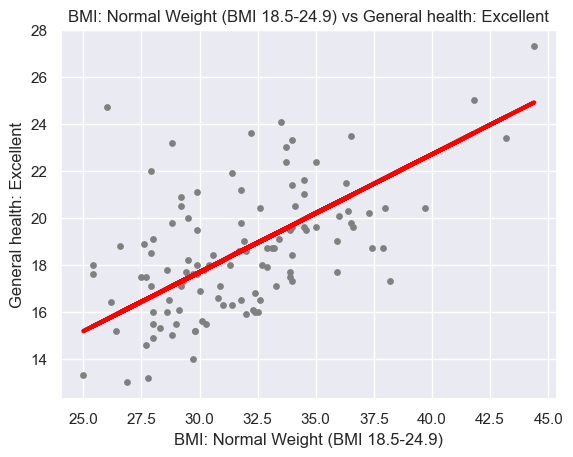

BMI: Normal Weight (BMI 18.5-24.9) vs General health: Excellent
Slope: [[0.50184548]]
RMSE:  2.298
R2 score:  0.266 




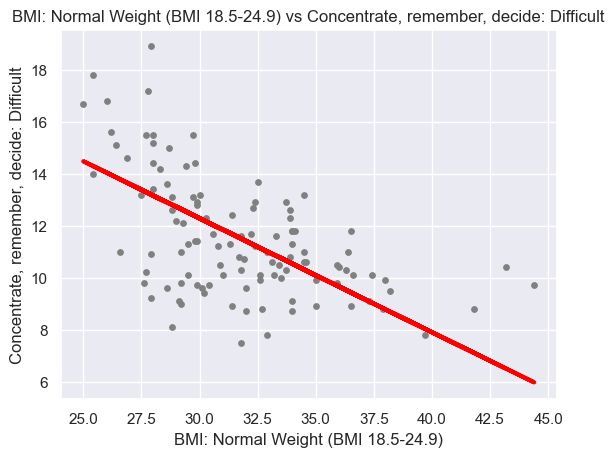

BMI: Normal Weight (BMI 18.5-24.9) vs Concentrate, remember, decide: Difficult
Slope: [[-0.43861118]]
RMSE:  1.962
R2 score:  0.273 




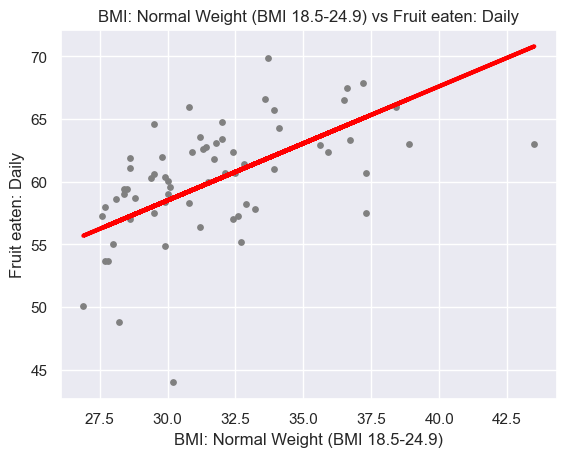

BMI: Normal Weight (BMI 18.5-24.9) vs Fruit eaten: Daily
Slope: [[0.91005245]]
RMSE:  3.929
R2 score:  0.24 




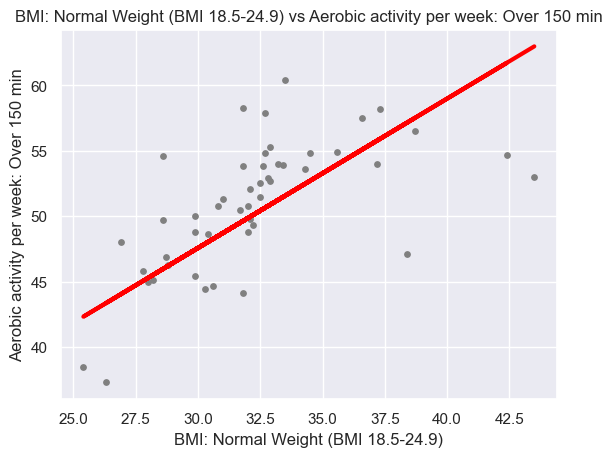

BMI: Normal Weight (BMI 18.5-24.9) vs Aerobic activity per week: Over 150 min
Slope: [[1.14099424]]
RMSE:  4.12
R2 score:  0.295 




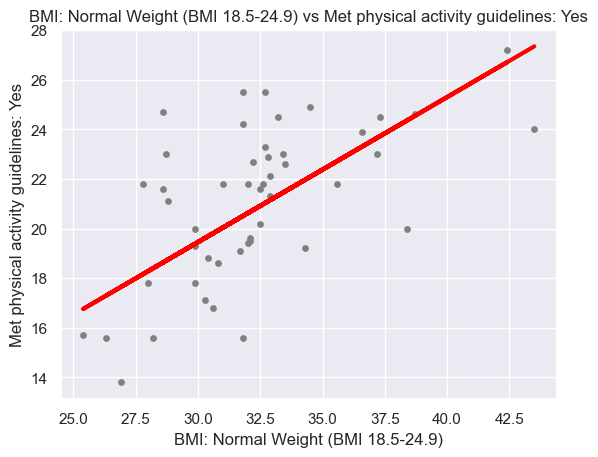

BMI: Normal Weight (BMI 18.5-24.9) vs Met physical activity guidelines: Yes
Slope: [[0.58434877]]
RMSE:  2.502
R2 score:  0.34 




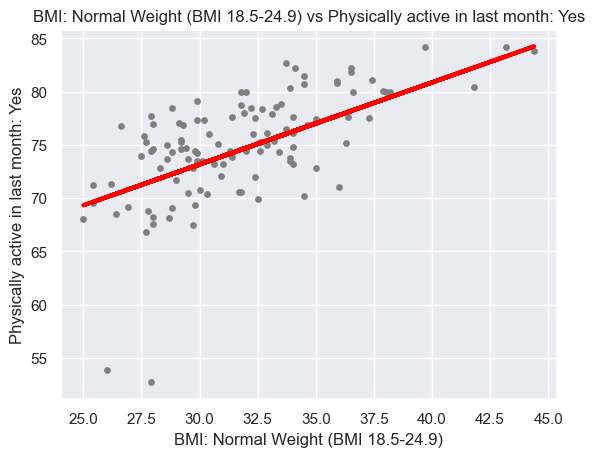

BMI: Normal Weight (BMI 18.5-24.9) vs Physically active in last month: Yes
Slope: [[0.769371]]
RMSE:  3.919
R2 score:  0.381 




In [25]:
#Plotting linear regressions for this variable

var = 'BMI: Normal Weight (BMI 18.5-24.9)'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In most BMI: Normal weight variable pairs with strong correlations, the clustering is too loose to create a good linear regression model. <b>BMI: Normal Weight (BMI 18.5-24.9) vs Physically active in last month: Yes</b> has two outliers where Physically active in last month: Yes < 55. Dropping these outliers might yield a better linear regression.
   </div>

<div class='alert alert-block alert-warning'>
    Possible refinement:<br><br>
    BMI categories had two outliers where <b>Physically active in last month: Yes < 55</b>. These outlying records should be looked into.
   </div>

### 3.5 General health
<div class="alert" style='background:#DCDCDC;color:#4D4D4D;padding:15px'>
    There are no strong correlations for General health: Good or BMI: Underweight (BMI 12.0-18.4), thus no liner regressions will be performed for them at this time.
    </div>

In [27]:
# Making a subeset of the boolean correlation matrix for this category

index_list = ['General health: Excellent',
              'General health: Very good',
              'General health: Good',
              'General health: Fair',
              'General health: Poor']

cat_corr = corrs[corrs.index.isin(index_list)] # Selecting the category's rows
cat_corr = cat_corr.drop(columns = index_list).copy() # dropping category's columns to reduce meaningless correlations
cat_corr

year BMI: Obese (BMI 30.0 - 99.8)  \
General health: Excellent  False                         True   
General health: Very good  False                        False   
General health: Good       False                        False   
General health: Fair       False                        False   
General health: Poor       False                         True   

                          BMI: Overweight (BMI 25.0-29.9)  \
General health: Excellent                           False   
General health: Very good                           False   
General health: Good                                False   
General health: Fair                                False   
General health: Poor                                False   

                          BMI: Normal Weight (BMI 18.5-24.9)  \
General health: Excellent                               True   
General health: Very good                              False   
General health: Good                                   False   
General health: Fair                                   False   
General health: Poor                                   False   

                          BMI: Underweight (BMI 12.0-18.4)  \
General health: Excellent                            False   
General health: Very good                            False   
General health: Good                                 False   
General health: Fair                                 False   
General health: Poor                                 False   

                          Doc visit: Past year Doc visit: Past 2 years  \
General health: Excellent                False                   False   
General health: Very good                False                   False   
General health: Good                     False                   False   
General health: Fair                     False                   False   
General health: Poor                     False                   False   

                          Doc visit: Past 5 years Doc visit: 5+ years ago  \
General health: Excellent                   False                   False   
General health: Very good                   False                   False   
General health: Good                        False                   False   
General health: Fair                        False                   False   
General health: Poor                        False                   False   

                          Doc visit: Never  \
General health: Excellent            False   
General health: Very good            False   
General health: Good                 False   
General health: Fair                 False   
General health: Poor                 False   

                          Concentrate, remember, decide: Difficult  \
General health: Excellent                                     True   
General health: Very good                                     True   
General health: Good                                         False   
General health: Fair                                          True   
General health: Poor                                          True   

                          Bad mental health days: 0  \
General health: Excellent                     False   
General health: Very good                     False   
General health: Good                          False   
General health: Fair                          False   
General health: Poor                          False   

                          Bad mental health days: 1-13  \
General health: Excellent                        False   
General health: Very good                         True   
General health: Good                             False   
General health: Fair                              True   
General health: Poor                             False   

                          Bad mental health days: 14+ Fruit eaten: Daily  \
General health: Excellent                        True              False   
General health: Very good                       False               True  

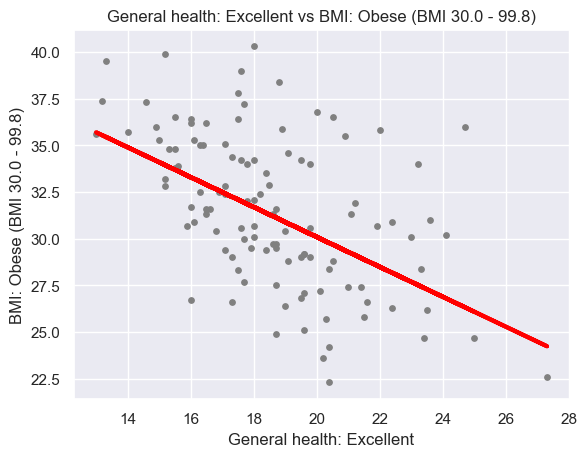

General health: Excellent vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[-0.80150406]]
RMSE:  3.487
R2 score:  0.26 




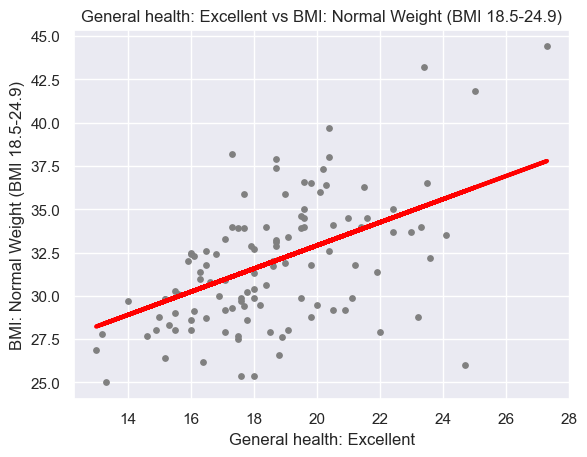

General health: Excellent vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[0.66858448]]
RMSE:  3.142
R2 score:  0.285 




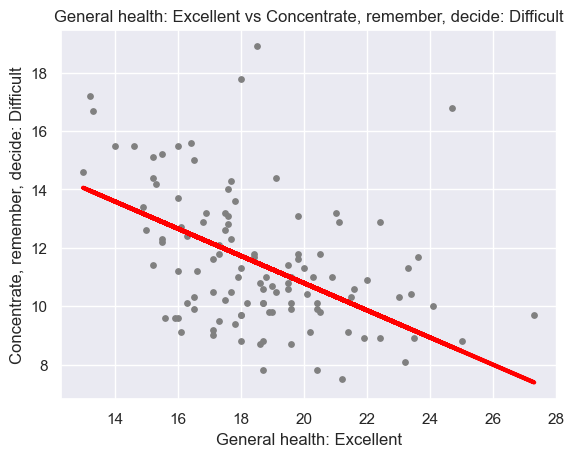

General health: Excellent vs Concentrate, remember, decide: Difficult
Slope: [[-0.46640448]]
RMSE:  2.117
R2 score:  0.154 




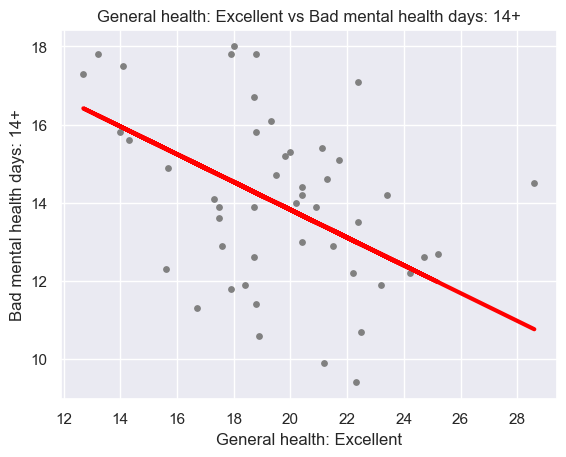

General health: Excellent vs Bad mental health days: 14+
Slope: [[-0.35555265]]
RMSE:  2.047
R2 score:  0.118 




In [28]:
#Plotting linear regressions for this variable

var = 'General health: Excellent'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In all General health: Excellent variable pairs with strong correlations, the clustering is too loose to create a good linear regression model.
   </div>

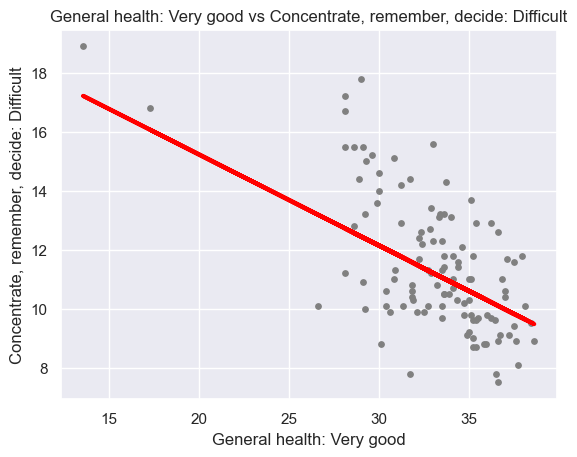

General health: Very good vs Concentrate, remember, decide: Difficult
Slope: [[-0.30961469]]
RMSE:  1.828
R2 score:  0.369 




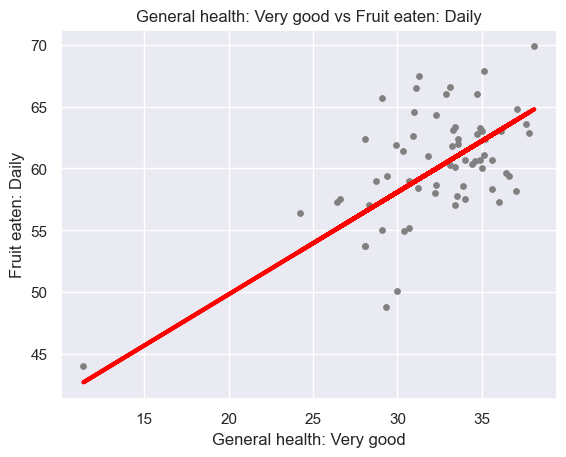

General health: Very good vs Fruit eaten: Daily
Slope: [[0.82935575]]
RMSE:  3.719
R2 score:  0.319 




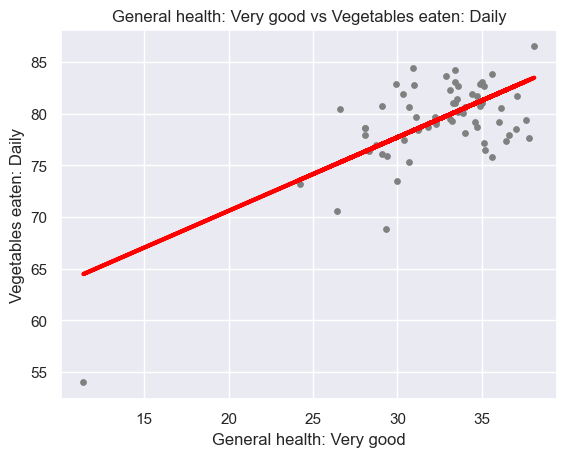

General health: Very good vs Vegetables eaten: Daily
Slope: [[0.71152601]]
RMSE:  3.256
R2 score:  0.469 




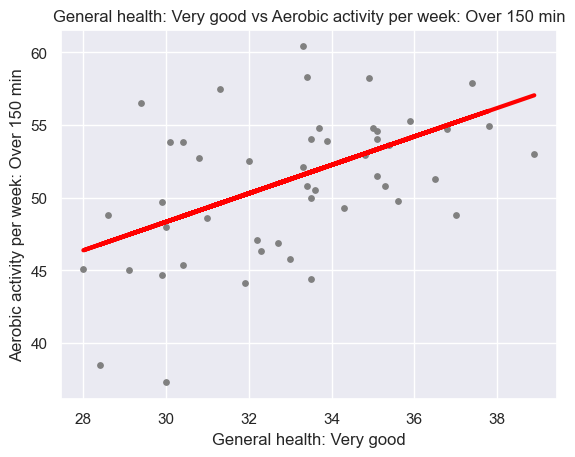

General health: Very good vs Aerobic activity per week: Over 150 min
Slope: [[0.97772685]]
RMSE:  4.318
R2 score:  0.225 




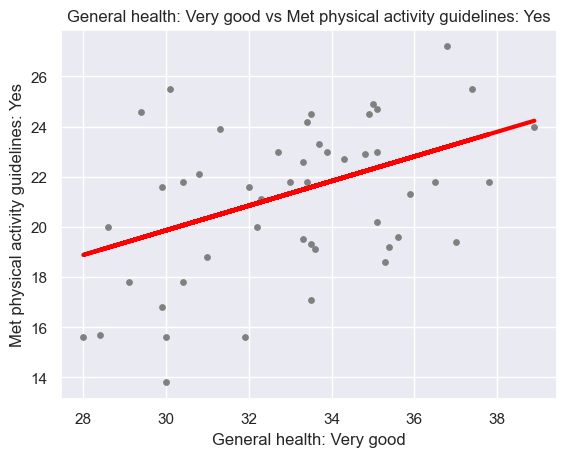

General health: Very good vs Met physical activity guidelines: Yes
Slope: [[0.49087644]]
RMSE:  2.754
R2 score:  0.199 




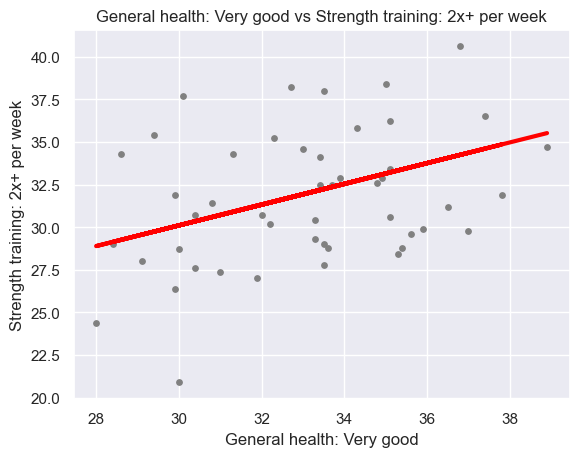

General health: Very good vs Strength training: 2x+ per week
Slope: [[0.60779293]]
RMSE:  3.693
R2 score:  0.107 




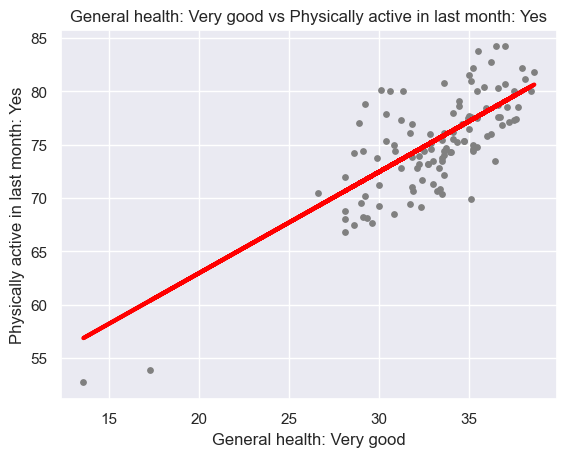

General health: Very good vs Physically active in last month: Yes
Slope: [[0.95075587]]
RMSE:  3.162
R2 score:  0.597 




In [29]:
#Plotting linear regressions for this variable

var = 'General health: Very good'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In most General health: Very good variable pairs with strong correlations, the clustering is too loose to create a good linear regression model. <b>General health: Very good vs Physically active in last month: Yes</b> has two outliers where Physically active in last month: Yes < 55. Dropping these outliers might yield a better linear regression.
   </div>

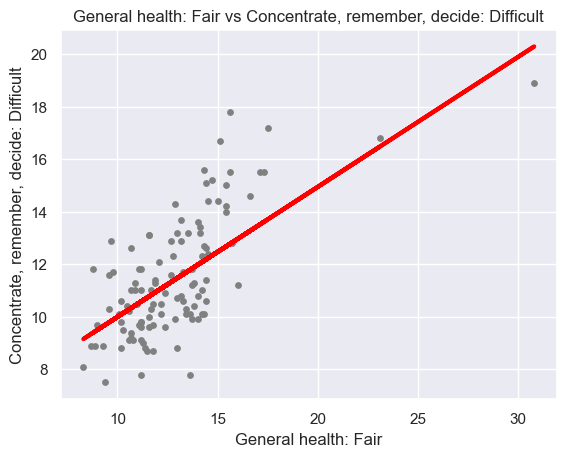

General health: Fair vs Concentrate, remember, decide: Difficult
Slope: [[0.49488308]]
RMSE:  1.657
R2 score:  0.482 




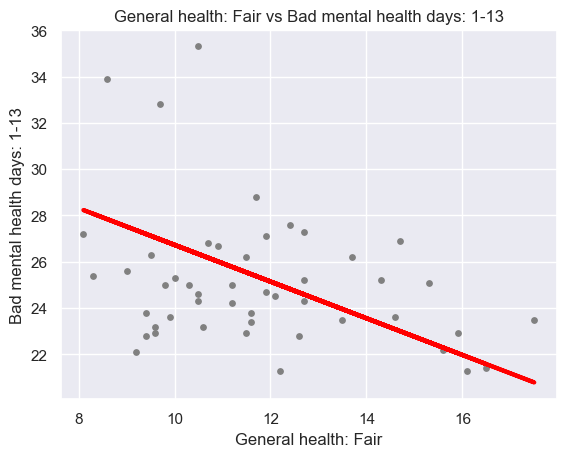

General health: Fair vs Bad mental health days: 1-13
Slope: [[-0.79243523]]
RMSE:  2.871
R2 score:  0.005 




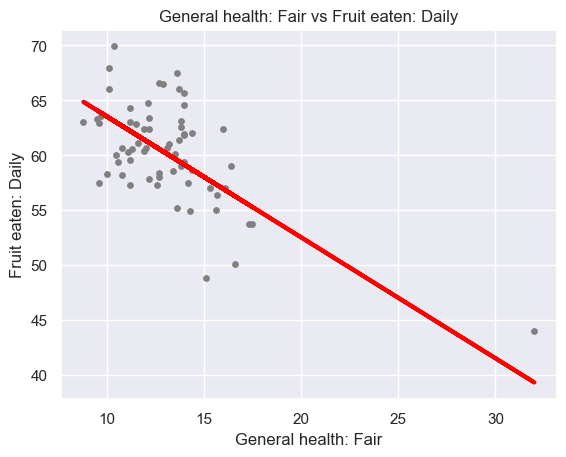

General health: Fair vs Fruit eaten: Daily
Slope: [[-1.10055933]]
RMSE:  3.601
R2 score:  0.362 




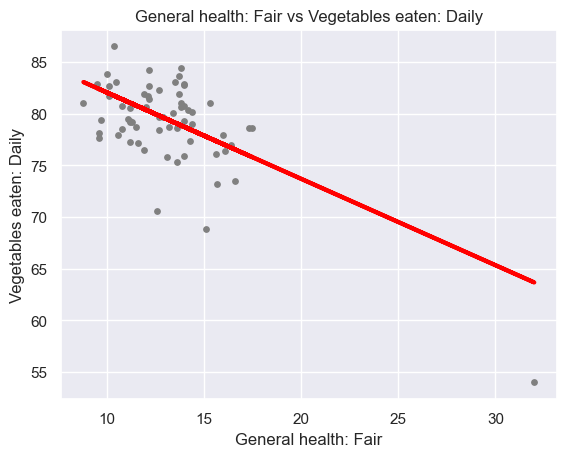

General health: Fair vs Vegetables eaten: Daily
Slope: [[-0.83568662]]
RMSE:  3.267
R2 score:  0.466 




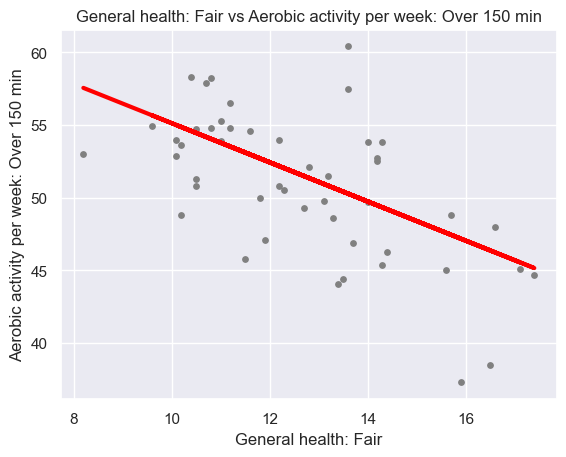

General health: Fair vs Aerobic activity per week: Over 150 min
Slope: [[-1.346411]]
RMSE:  3.962
R2 score:  0.348 




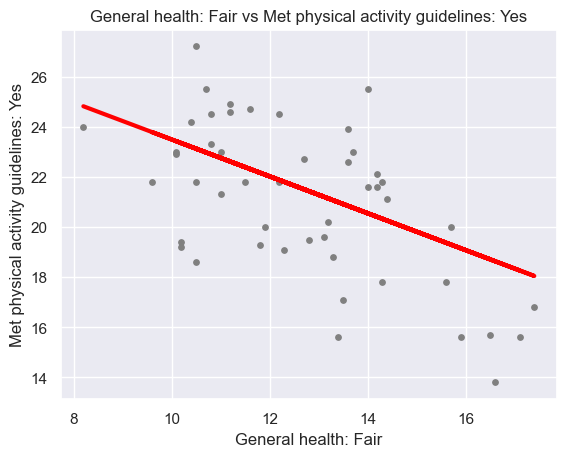

General health: Fair vs Met physical activity guidelines: Yes
Slope: [[-0.73570593]]
RMSE:  2.507
R2 score:  0.337 




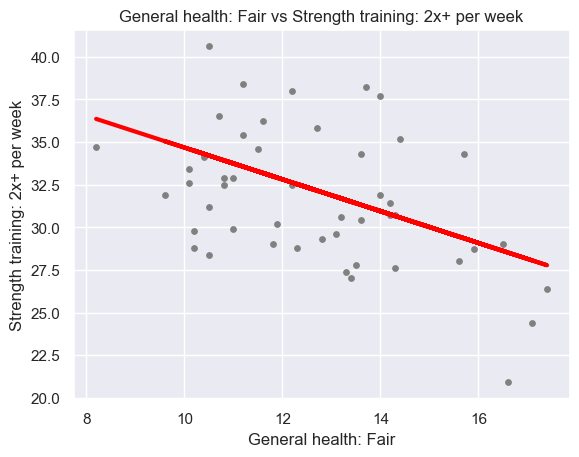

General health: Fair vs Strength training: 2x+ per week
Slope: [[-0.93263014]]
RMSE:  3.532
R2 score:  0.183 




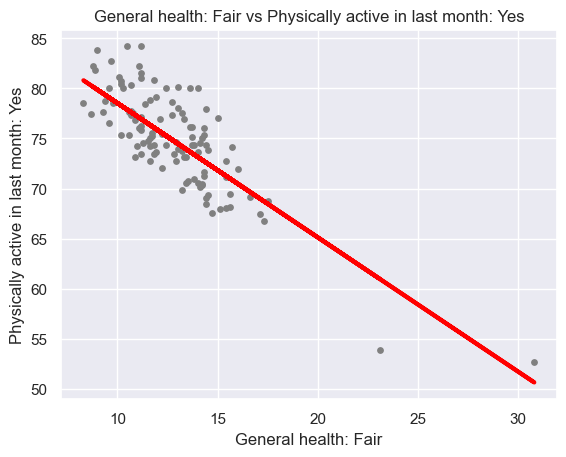

General health: Fair vs Physically active in last month: Yes
Slope: [[-1.34213434]]
RMSE:  2.902
R2 score:  0.66 




In [31]:
#Plotting linear regressions for this variable

var = 'General health: Fair'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In most General health: Fair variable pairs with strong correlations, the clustering is too loose to create a good linear regression model. <b>General health: Fair vs Physically active in last month: Yes</b> has two outliers where Physically active in last month: Yes < 55. Dropping these outliers might yield a better linear regression.
   </div>

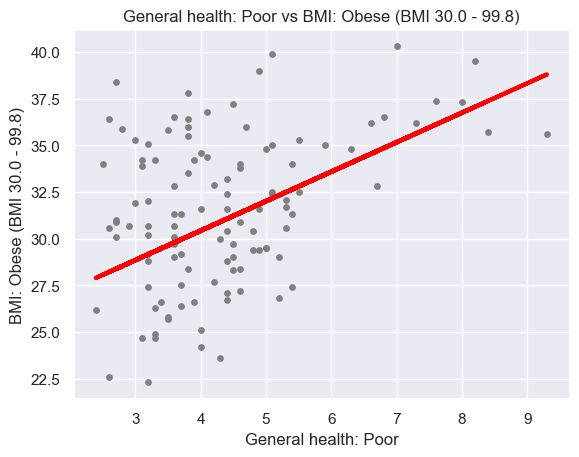

General health: Poor vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[1.57989591]]
RMSE:  3.815
R2 score:  0.114 




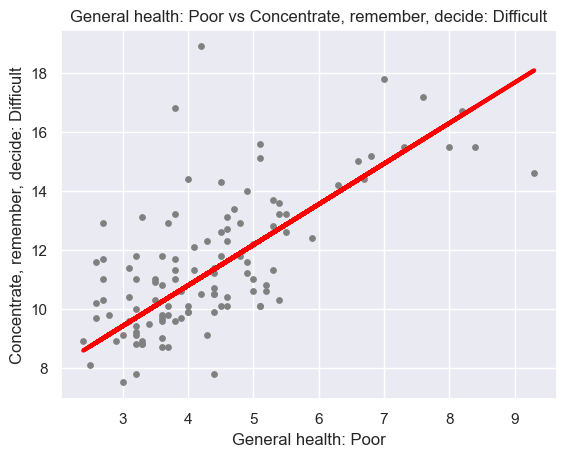

General health: Poor vs Concentrate, remember, decide: Difficult
Slope: [[1.37757054]]
RMSE:  1.754
R2 score:  0.419 




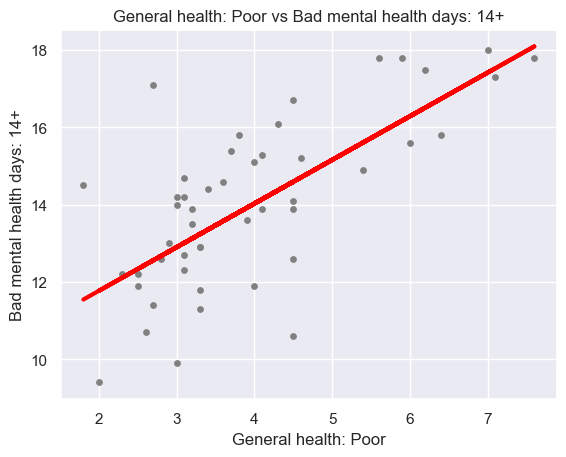

General health: Poor vs Bad mental health days: 14+
Slope: [[1.12943224]]
RMSE:  1.565
R2 score:  0.485 




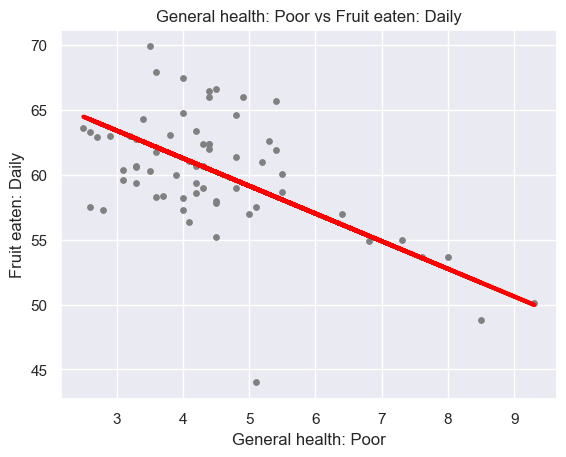

General health: Poor vs Fruit eaten: Daily
Slope: [[-2.1335545]]
RMSE:  3.837
R2 score:  0.275 




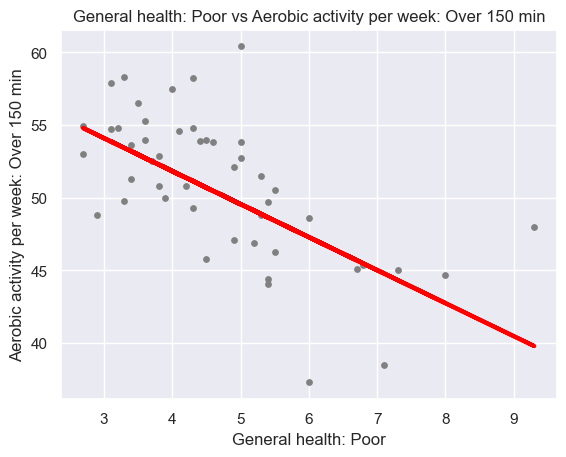

General health: Poor vs Aerobic activity per week: Over 150 min
Slope: [[-2.27014155]]
RMSE:  3.857
R2 score:  0.382 




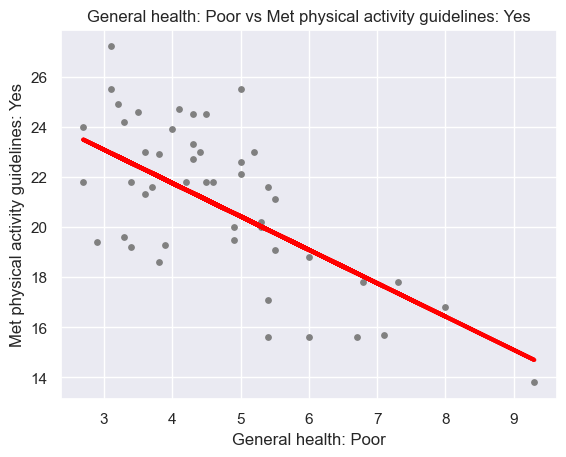

General health: Poor vs Met physical activity guidelines: Yes
Slope: [[-1.33129498]]
RMSE:  2.234
R2 score:  0.473 




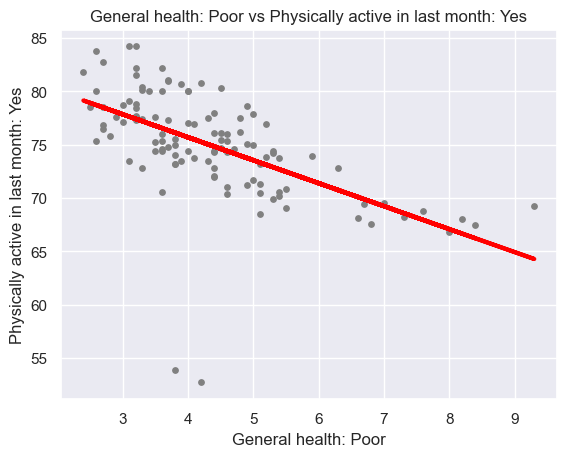

General health: Poor vs Physically active in last month: Yes
Slope: [[-2.15373312]]
RMSE:  4.086
R2 score:  0.327 




In [32]:
#Plotting linear regressions for this variable

var = 'General health: Poor'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In most General health: Poor variable pairs with strong correlations, the clustering is too loose to create a good linear regression model. <b>General health: Poor vs Physically active in last month: Yes</b> has two outliers where Physically active in last month: Yes < 55. Dropping these outliers might yield a better linear regression.
   </div>

<div class='alert alert-block alert-warning'>
    Possible refinement:<br><br>
    General health had three outliers where <b>Physically active in last month: Yes < 55</b> in three variable pairs. These outlying records should be looked into.
   </div>

### 3.6 Mental health

In [33]:
# Making a subeset of the boolean correlation matrix for this category

index_list = ['Concentrate, remember, decide: Difficult',
              'Bad mental health days: 0',
              'Bad mental health days: 1-13',
              'Bad mental health days: 14+']

cat_corr = corrs[corrs.index.isin(index_list)] # Selecting the category's rows
cat_corr = cat_corr.drop(columns = index_list).copy() # dropping category's columns to reduce meaningless correlations
cat_corr

year BMI: Obese (BMI 30.0 - 99.8)  \
Concentrate, remember, decide: Difficult  False                         True   
Bad mental health days: 0                 False                        False   
Bad mental health days: 1-13              False                        False   
Bad mental health days: 14+               False                        False   

                                         BMI: Overweight (BMI 25.0-29.9)  \
Concentrate, remember, decide: Difficult                           False   
Bad mental health days: 0                                          False   
Bad mental health days: 1-13                                       False   
Bad mental health days: 14+                                        False   

                                         BMI: Normal Weight (BMI 18.5-24.9)  \
Concentrate, remember, decide: Difficult                               True   
Bad mental health days: 0                                             False   
Bad mental health days: 1-13                                          False   
Bad mental health days: 14+                                           False   

                                         BMI: Underweight (BMI 12.0-18.4)  \
Concentrate, remember, decide: Difficult                            False   
Bad mental health days: 0                                           False   
Bad mental health days: 1-13                                        False   
Bad mental health days: 14+                                         False   

                                         General health: Excellent  \
Concentrate, remember, decide: Difficult                      True   
Bad mental health days: 0                                    False   
Bad mental health days: 1-13                                 False   
Bad mental health days: 14+                                   True   

                                         General health: Very good  \
Concentrate, remember, decide: Difficult                      True   
Bad mental health days: 0                                    False   
Bad mental health days: 1-13                                  True   
Bad mental health days: 14+                                  False   

                                         General health: Good  \
Concentrate, remember, decide: Difficult                False   
Bad mental health days: 0                               False   
Bad mental health days: 1-13                            False   
Bad mental health days: 14+                             False   

                                         General health: Fair  \
Concentrate, remember, decide: Difficult                 True   
Bad mental health days: 0                               False   
Bad mental health days: 1-13                             True   
Bad mental health days: 14+                             False   

                                         General health: Poor  ...  \
Concentrate, remember, decide: Difficult                 True  ...   
Bad mental health days: 0                               False  ...   
Bad mental health days: 1-13                            False  ...   
Bad mental health days: 14+                              True  ...   

                                         Doc visit: Past 2 years  \
Concentrate, remember, decide: Difficult                   False   
Bad mental health days: 0                                  False   
Bad mental health days: 1-13                               False   
Bad mental health days: 14+                                False   

                                         Doc visit: Past 5 years  \
Concentrate, remember, decide: Difficult                   False   
Bad mental health days: 0                                  False   
Bad mental health days: 1-13                               False   
Bad mental health days: 14+                                False   

                                         Doc visit: 5+ years ago  \
Concentrate, remember, d

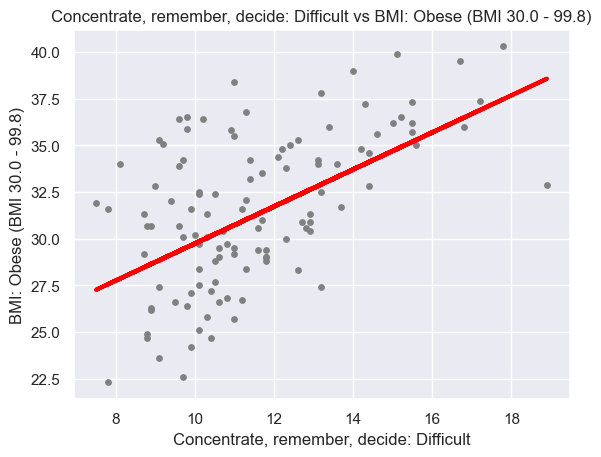

Concentrate, remember, decide: Difficult vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[0.99197868]]
RMSE:  3.386
R2 score:  0.302 




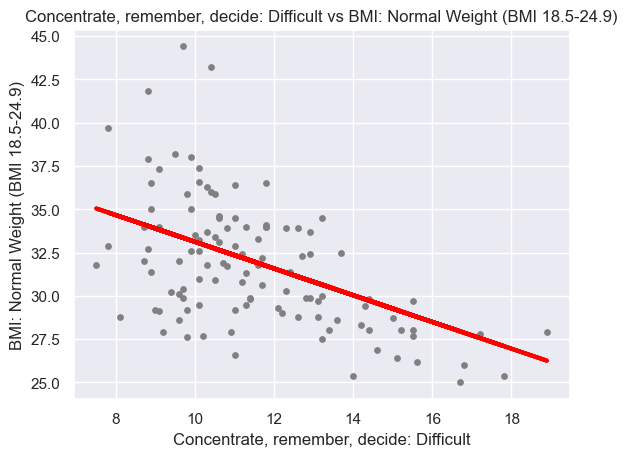

Concentrate, remember, decide: Difficult vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[-0.77135648]]
RMSE:  3.127
R2 score:  0.291 




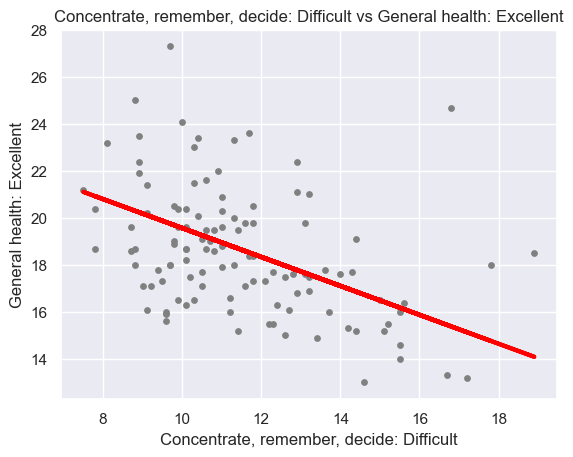

Concentrate, remember, decide: Difficult vs General health: Excellent
Slope: [[-0.61567551]]
RMSE:  2.463
R2 score:  0.157 




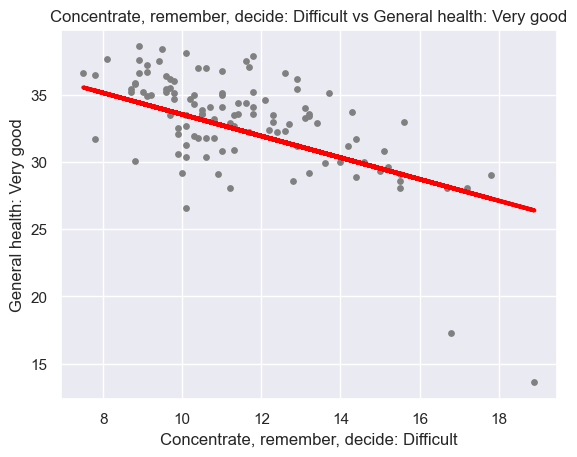

Concentrate, remember, decide: Difficult vs General health: Very good
Slope: [[-0.80224822]]
RMSE:  2.944
R2 score:  0.352 




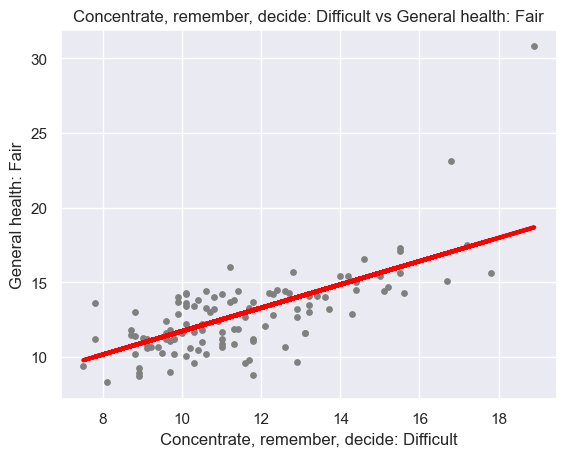

Concentrate, remember, decide: Difficult vs General health: Fair
Slope: [[0.78063077]]
RMSE:  2.017
R2 score:  0.488 




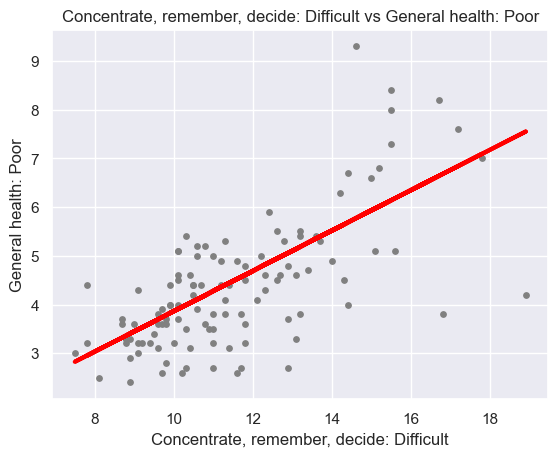

Concentrate, remember, decide: Difficult vs General health: Poor
Slope: [[0.41472801]]
RMSE:  1.006
R2 score:  0.434 




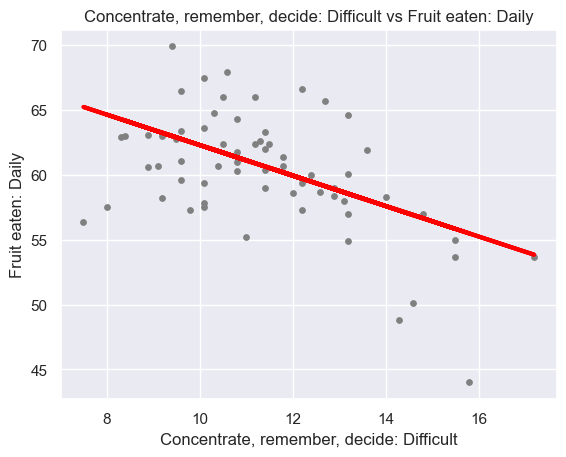

Concentrate, remember, decide: Difficult vs Fruit eaten: Daily
Slope: [[-1.17458496]]
RMSE:  3.836
R2 score:  0.276 




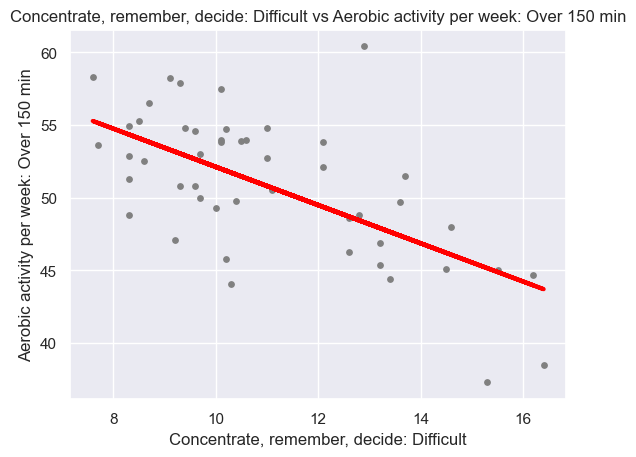

Concentrate, remember, decide: Difficult vs Aerobic activity per week: Over 150 min
Slope: [[-1.3140946]]
RMSE:  3.739
R2 score:  0.419 




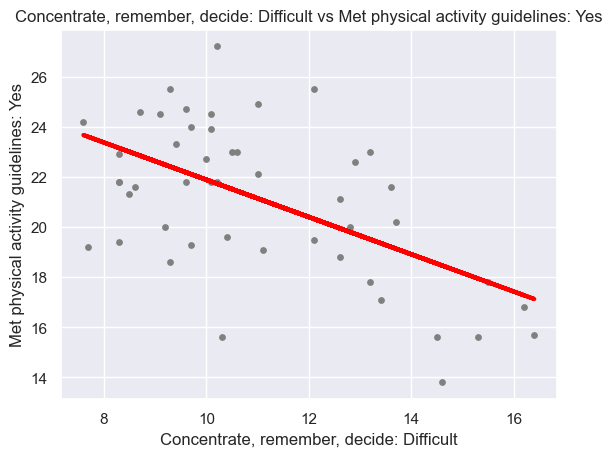

Concentrate, remember, decide: Difficult vs Met physical activity guidelines: Yes
Slope: [[-0.74319989]]
RMSE:  2.533
R2 score:  0.323 




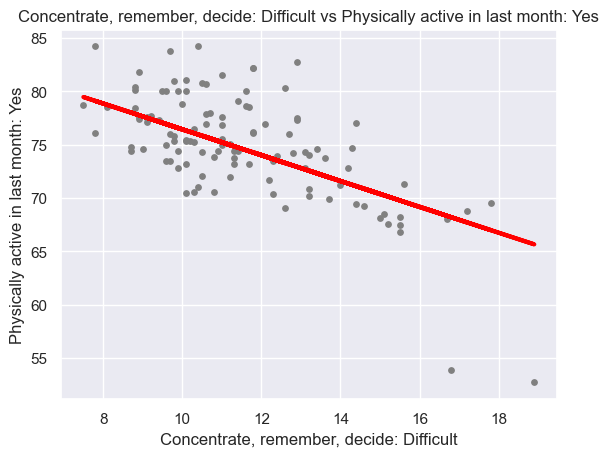

Concentrate, remember, decide: Difficult vs Physically active in last month: Yes
Slope: [[-1.21165604]]
RMSE:  3.742
R2 score:  0.435 




In [34]:
#Plotting linear regressions for this variable

var = 'Concentrate, remember, decide: Difficult'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In many Concentrate, remember, decide: Difficult variable pairs with strong correlations the clustering is too loose to create a good linear regression model. However, three pairs had noticable outliers:<br><br>
   <li>Concentrate, remember, decide: Difficult vs General health: Very good where General health: Very good < 20.<br>
   <li>Concentrate, remember, decide: Difficult vs General health: Fair where General health: Fair > 20.<br>
   <li>Concentrate, remember, decide: Difficult vs Physically active in last month: Yes where Physically active in last month: Yes < 55.<br><br>
    Dropping these outliers might yield better linear regressions.
   </div>

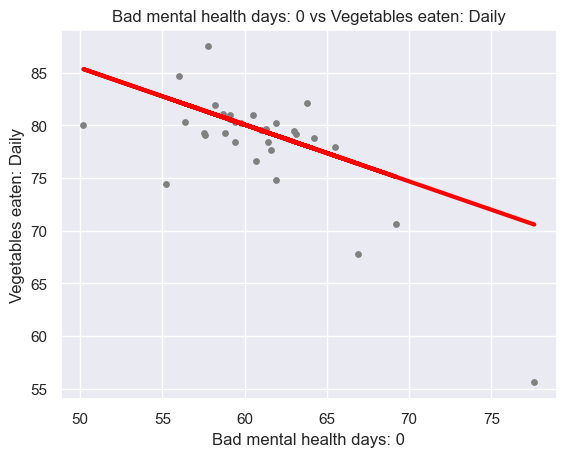

Bad mental health days: 0 vs Vegetables eaten: Daily
Slope: [[-0.53861392]]
RMSE:  4.081
R2 score:  0.427 




In [35]:
#Plotting linear regressions for this variable

var = 'Bad mental health days: 0'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   Bad mental health days: 0 vs Vegetables eaten: Daily had a noticable outlier where Vegetables eaten: Daily < 60. Dropping these outliers might yield a better linear regression.
   </div>

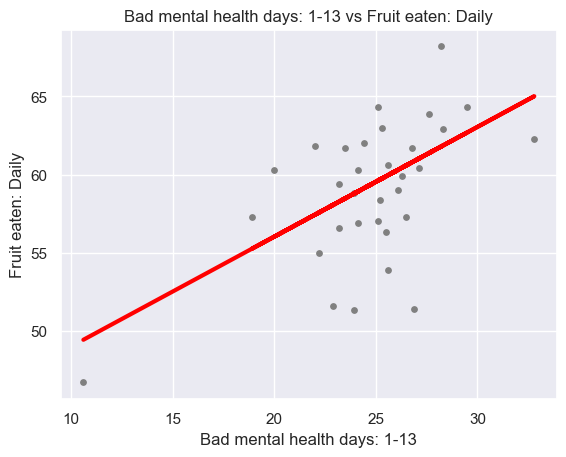

Bad mental health days: 1-13 vs Fruit eaten: Daily
Slope: [[0.7020197]]
RMSE:  3.687
R2 score:  0.32 




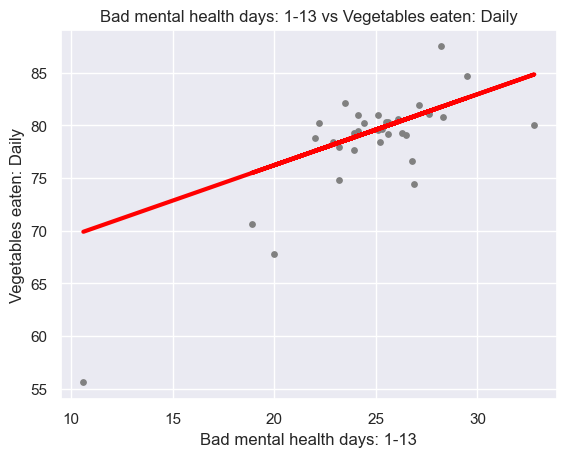

Bad mental health days: 1-13 vs Vegetables eaten: Daily
Slope: [[0.67289641]]
RMSE:  3.831
R2 score:  0.495 




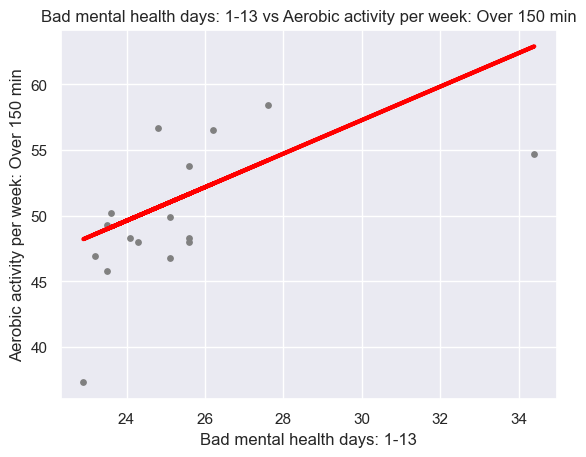

Bad mental health days: 1-13 vs Aerobic activity per week: Over 150 min
Slope: [[1.27741415]]
RMSE:  4.513
R2 score:  0.2 




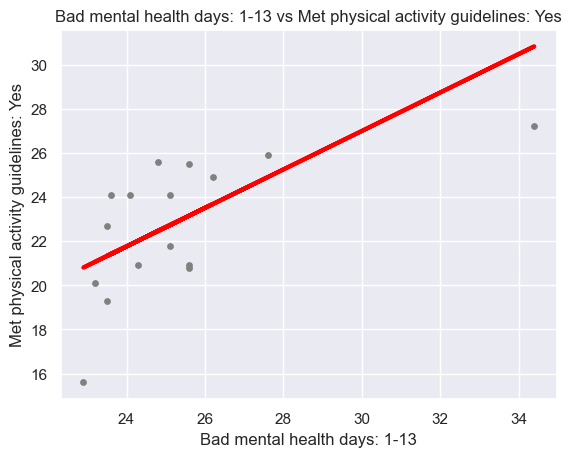

Bad mental health days: 1-13 vs Met physical activity guidelines: Yes
Slope: [[0.87146271]]
RMSE:  2.397
R2 score:  0.329 




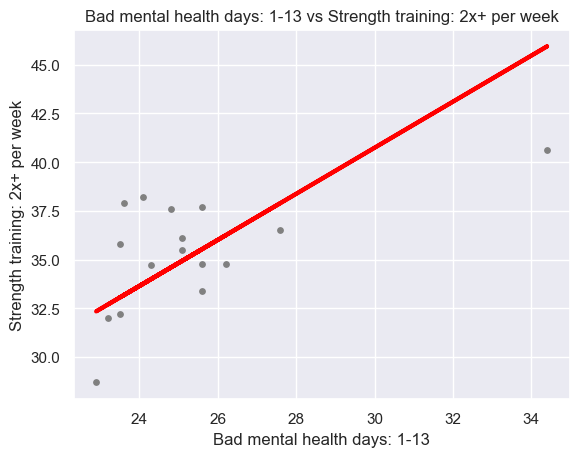

Bad mental health days: 1-13 vs Strength training: 2x+ per week
Slope: [[1.18277111]]
RMSE:  2.712
R2 score:  0.059 




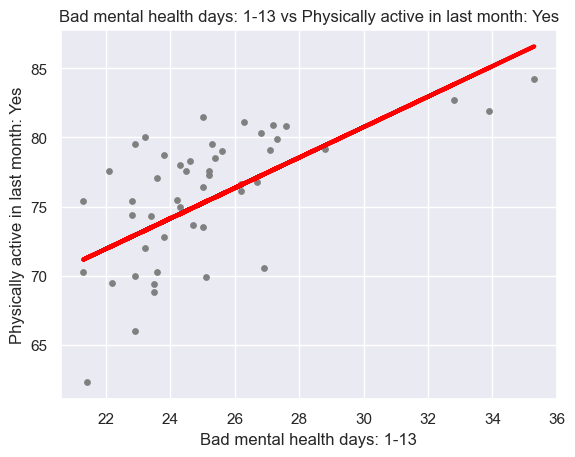

Bad mental health days: 1-13 vs Physically active in last month: Yes
Slope: [[1.10055047]]
RMSE:  3.674
R2 score:  0.368 




In [36]:
#Plotting linear regressions for this variable

var = 'Bad mental health days: 1-13'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   Bad mental health days: 1-13 vs Vegetables eaten: Daily had a noticable outlier where Vegetables eaten: Daily < 60. Dropping these outliers might yield a better linear regression.
   </div>

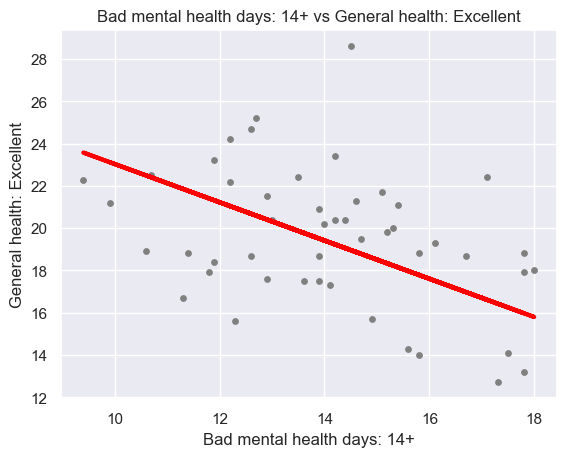

Bad mental health days: 14+ vs General health: Excellent
Slope: [[-0.90469397]]
RMSE:  3.081
R2 score:  0.081 




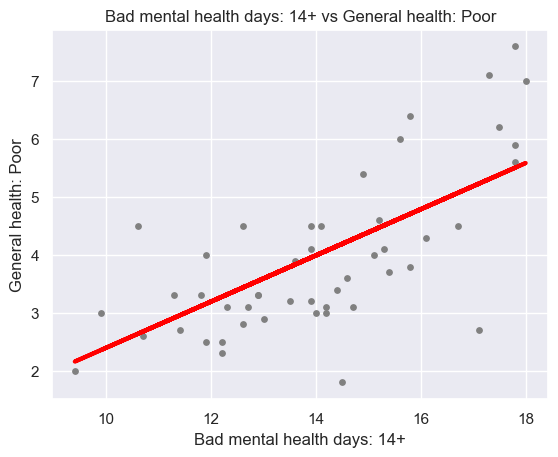

Bad mental health days: 14+ vs General health: Poor
Slope: [[0.39852335]]
RMSE:  0.989
R2 score:  0.479 




In [37]:
#Plotting linear regressions for this variable

var = 'Bad mental health days: 14+'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   None of the variable pairs for Bad mental health days: 14+ resulted in good linear regression models.
   </div>

<div class='alert alert-block alert-warning'>
    Possible refinement:<br><br>
    Mental health had two outliers where:<br><br>
    <li><b>Vegetables eaten: Daily < 60</b> in three variable pairs
    <li>General health: Very good < 20 in one variable pair
    <li>General health: Fair > 20 in one variable pair
    <li>Physically active in last month: Yes < 55in one variable pair<br><br>
    These outlying records should be looked into.
   </div>

### 3.7 Dietary health

In [38]:
# Making a subeset of the boolean correlation matrix for this category

index_list = ['Fruit eaten: Daily',
              'Vegetables eaten: Daily']

cat_corr = corrs[corrs.index.isin(index_list)] # Selecting the category's rows
cat_corr = cat_corr.drop(columns = index_list).copy() # dropping category's columns to reduce meaningless correlations
cat_corr

year BMI: Obese (BMI 30.0 - 99.8)  \
Fruit eaten: Daily       False                         True   
Vegetables eaten: Daily  False                        False   

                        BMI: Overweight (BMI 25.0-29.9)  \
Fruit eaten: Daily                                False   
Vegetables eaten: Daily                           False   

                        BMI: Normal Weight (BMI 18.5-24.9)  \
Fruit eaten: Daily                                    True   
Vegetables eaten: Daily                              False   

                        BMI: Underweight (BMI 12.0-18.4)  \
Fruit eaten: Daily                                 False   
Vegetables eaten: Daily                            False   

                        General health: Excellent General health: Very good  \
Fruit eaten: Daily                          False                      True   
Vegetables eaten: Daily                     False                      True   

                        General health: Good General health: Fair  \
Fruit eaten: Daily                     False                 True   
Vegetables eaten: Daily                False                 True   

                        General health: Poor  ... Doc visit: 5+ years ago  \
Fruit eaten: Daily                      True  ...                   False   
Vegetables eaten: Daily                False  ...                   False   

                        Doc visit: Never  \
Fruit eaten: Daily                 False   
Vegetables eaten: Daily            False   

                        Concentrate, remember, decide: Difficult  \
Fruit eaten: Daily                                          True   
Vegetables eaten: Daily                                    False   

                        Bad mental health days: 0  \
Fruit eaten: Daily                          False   
Vegetables eaten: Daily                      True   

                        Bad mental health days: 1-13  \
Fruit eaten: Daily                              True   
Vegetables eaten: Daily                         True   

                        Bad mental health days: 14+  \
Fruit eaten: Daily                            False   
Vegetables eaten: Daily                       False   

                        Aerobic activity per week: Over 150 min  \
Fruit eaten: Daily                                         True   
Vegetables eaten: Daily                                    True   

                        Met physical activity guidelines: Yes  \
Fruit eaten: Daily                                       True   
Vegetables eaten: Daily                                  True   

                        Strength training: 2x+ per week  \
Fruit eaten: Daily                                 True   
Vegetables eaten: Daily                           False   

                        Physically active in last month: Yes  
Fruit eaten: Daily                                      True  
Vegetables eaten: Daily                                 True  

[2 rows x 23 columns]

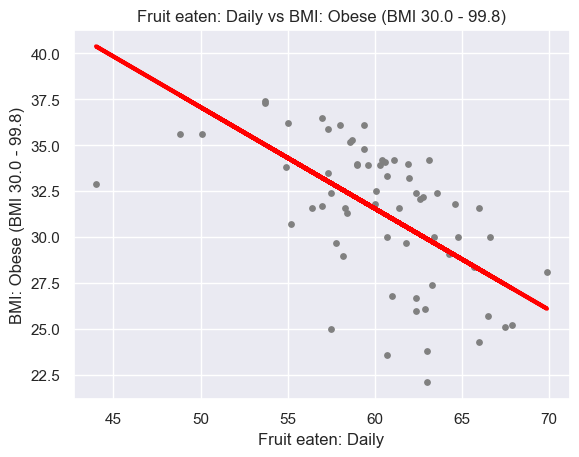

Fruit eaten: Daily vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[-0.55080664]]
RMSE:  3.194
R2 score:  0.288 




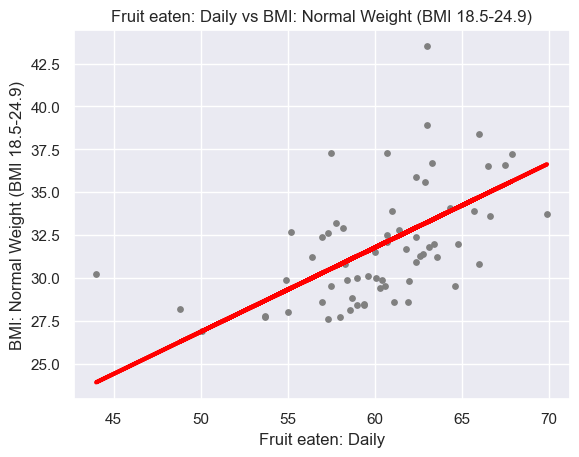

Fruit eaten: Daily vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[0.49120519]]
RMSE:  2.896
R2 score:  0.241 




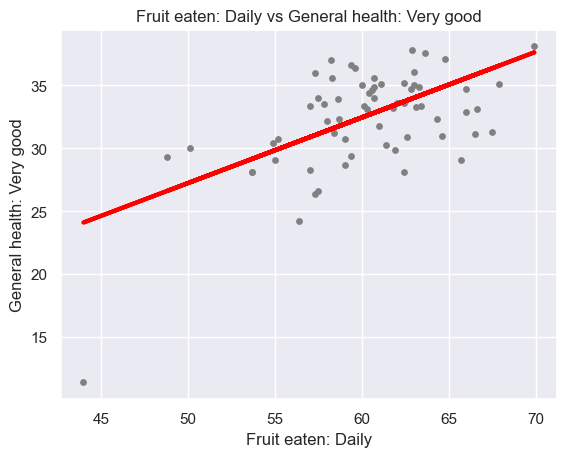

Fruit eaten: Daily vs General health: Very good
Slope: [[0.52211056]]
RMSE:  3.266
R2 score:  0.341 




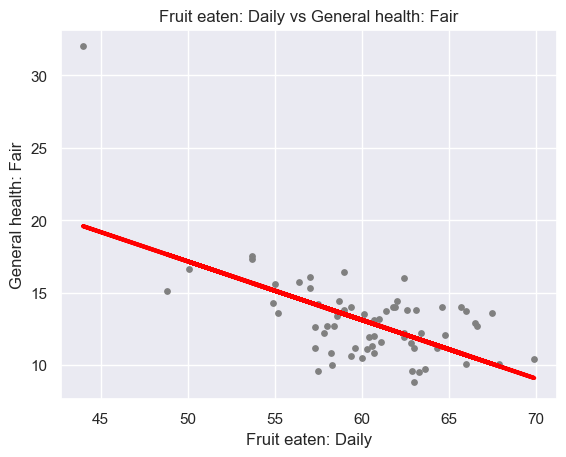

Fruit eaten: Daily vs General health: Fair
Slope: [[-0.40467696]]
RMSE:  2.468
R2 score:  0.382 




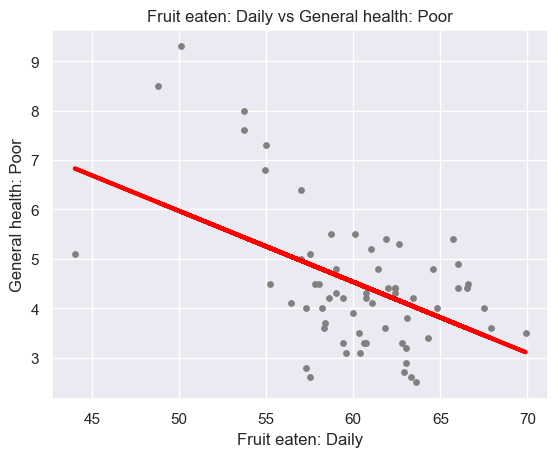

Fruit eaten: Daily vs General health: Poor
Slope: [[-0.14364814]]
RMSE:  1.178
R2 score:  0.284 




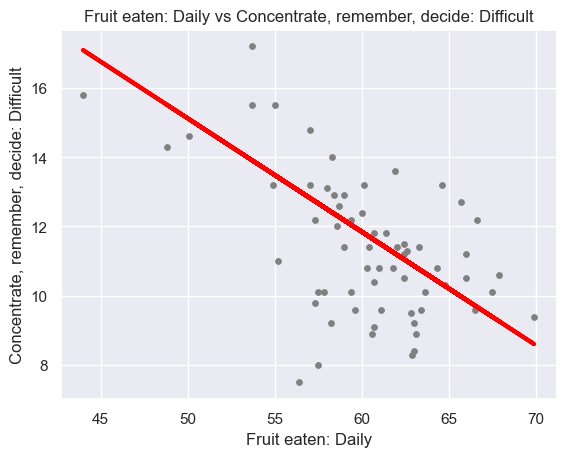

Fruit eaten: Daily vs Concentrate, remember, decide: Difficult
Slope: [[-0.32754534]]
RMSE:  1.807
R2 score:  0.215 




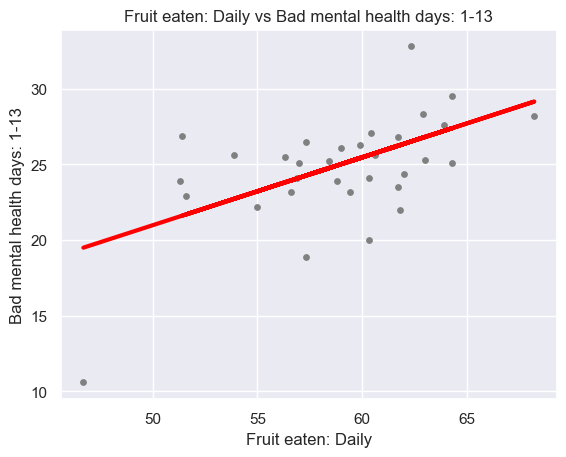

Fruit eaten: Daily vs Bad mental health days: 1-13
Slope: [[0.44902113]]
RMSE:  3.008
R2 score:  0.323 




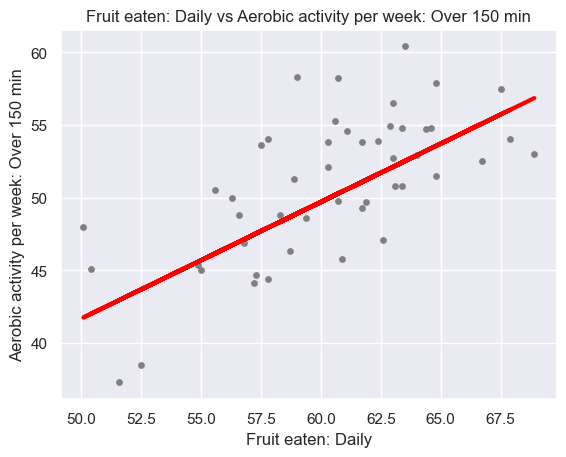

Fruit eaten: Daily vs Aerobic activity per week: Over 150 min
Slope: [[0.80246752]]
RMSE:  3.785
R2 score:  0.405 




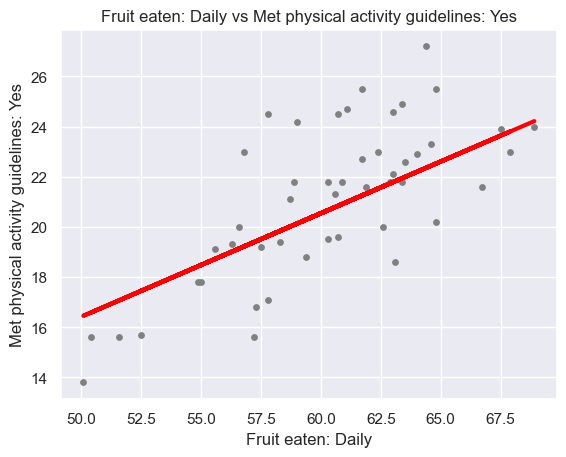

Fruit eaten: Daily vs Met physical activity guidelines: Yes
Slope: [[0.41299864]]
RMSE:  2.196
R2 score:  0.491 




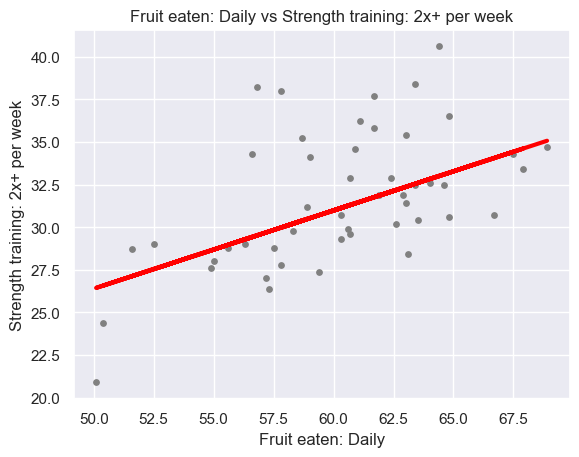

Fruit eaten: Daily vs Strength training: 2x+ per week
Slope: [[0.45886912]]
RMSE:  3.325
R2 score:  0.276 




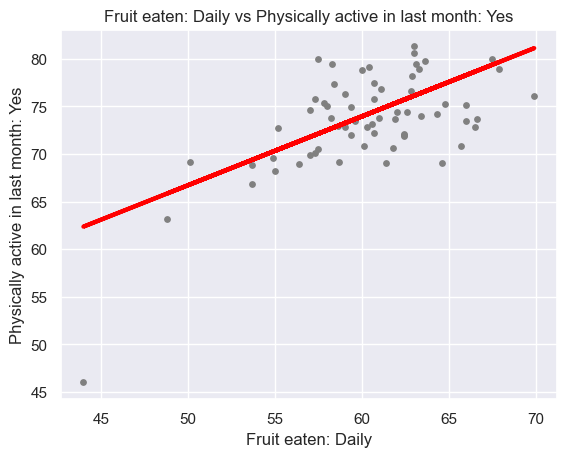

Fruit eaten: Daily vs Physically active in last month: Yes
Slope: [[0.72422421]]
RMSE:  4.02
R2 score:  0.385 




In [39]:
#Plotting linear regressions for this variable

var = 'Fruit eaten: Daily'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
       In many Fruit eaten: Daily variable pairs with strong correlations the clustering is too loose to create a good linear regression model. However, three pairs had noticable outliers:<br><br>
   <li>Fruit eaten: Daily vs General health: Fair where Fruit eaten: Daily < 45.<br>
   <li>Fruit eaten: Daily vs Bad mental health days: 1-13 where Fruit eaten: Daily < 45.<br>
   <li>Fruit eaten: Daily vs Physically active in last month: Yes where Fruit eaten: Daily < 45.<br><br>
    Dropping these outliers might yield better linear regressions. Should also look into records where Fruit eaten: Daily < 45.
   </div>

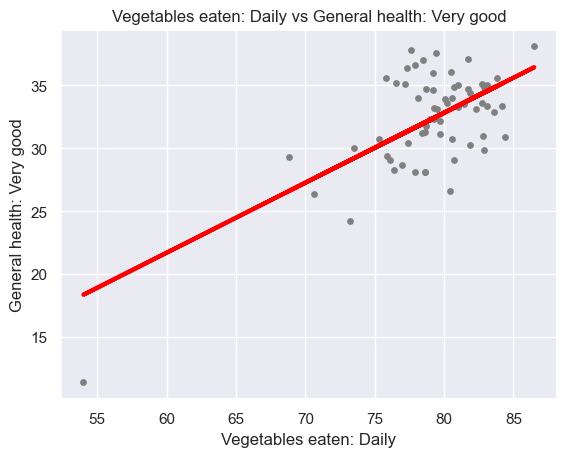

Vegetables eaten: Daily vs General health: Very good
Slope: [[0.55627933]]
RMSE:  2.929
R2 score:  0.471 




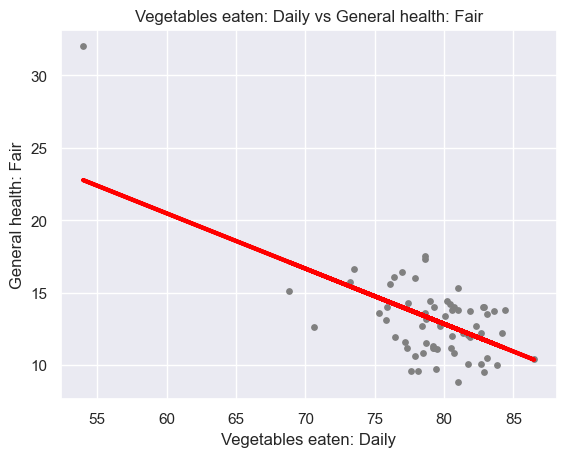

Vegetables eaten: Daily vs General health: Fair
Slope: [[-0.38160933]]
RMSE:  2.304
R2 score:  0.461 




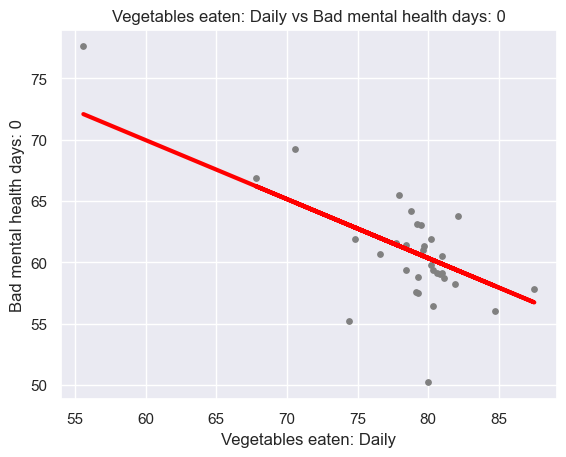

Vegetables eaten: Daily vs Bad mental health days: 0
Slope: [[-0.48135346]]
RMSE:  3.223
R2 score:  0.52 




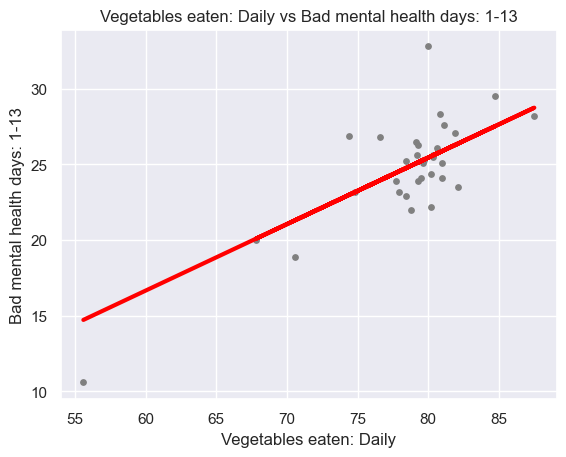

Vegetables eaten: Daily vs Bad mental health days: 1-13
Slope: [[0.43950877]]
RMSE:  2.233
R2 score:  0.627 




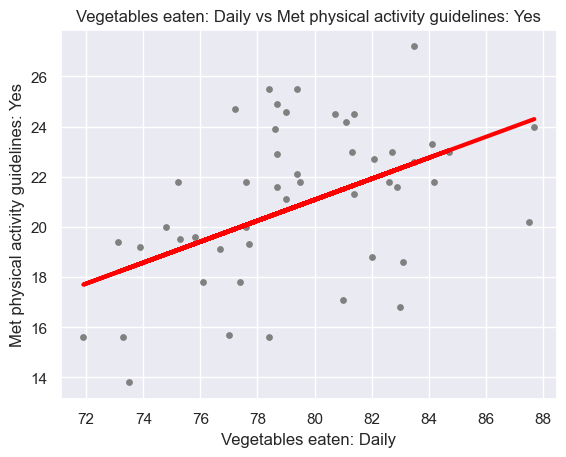

Vegetables eaten: Daily vs Met physical activity guidelines: Yes
Slope: [[0.41780991]]
RMSE:  2.749
R2 score:  0.202 




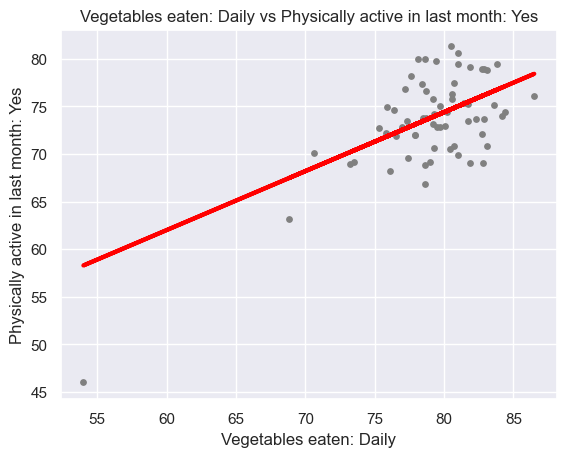

Vegetables eaten: Daily vs Physically active in last month: Yes
Slope: [[0.61963716]]
RMSE:  3.762
R2 score:  0.461 




In [40]:
#Plotting linear regressions for this variable

var = 'Vegetables eaten: Daily'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   In many Vegetables eaten: Daily variable pairs with strong correlations the clustering is too loose to create a good linear regression model. However, three pairs had noticable outliers:<br><br>
   <li>Vegetables eaten: Daily vs General health: Very good where Vegetables eaten: Daily < 55.<br>
   <li>Vegetables eaten: Daily vs General health: Fair where Vegetables eaten: Daily < 55.<br>
   <li>Vegetables eaten: Daily vs Physically active in last month: Yes where Vegetables eaten: Daily < 55.<br><br>
    Dropping these outliers might yield better linear regressions. Should also look into records where Vegetables eaten: Daily < 55.
   </div>

<div class='alert alert-block alert-warning'>
    Possible refinement:<br><br>
    Dietary health had two outliers where:<br><br>
    <li><b>Vegetables eaten: Daily < 55</b> in three variable pairs
        <li><b>Fruit eaten: Daily < 45</b> in three variable pairs<br><br>
    These outlying records should be looked into.
   </div>

### 3.8 Physical activity

In [45]:
# Making a subeset of the boolean correlation matrix for this category

index_list = ['Aerobic activity per week: Over 150 min',
              'Met physical activity guidelines: Yes',
              'Strength training: 2x+ per week',
              'Physically active in last month: Yes']

cat_corr = corrs[corrs.index.isin(index_list)] # Selecting the category's rows
cat_corr = cat_corr.drop(columns = index_list).copy() # dropping category's columns to reduce meaningless correlations
cat_corr

year BMI: Obese (BMI 30.0 - 99.8)  \
Aerobic activity per week: Over 150 min  False                         True   
Met physical activity guidelines: Yes    False                         True   
Strength training: 2x+ per week          False                        False   
Physically active in last month: Yes     False                         True   

                                        BMI: Overweight (BMI 25.0-29.9)  \
Aerobic activity per week: Over 150 min                           False   
Met physical activity guidelines: Yes                             False   
Strength training: 2x+ per week                                   False   
Physically active in last month: Yes                              False   

                                        BMI: Normal Weight (BMI 18.5-24.9)  \
Aerobic activity per week: Over 150 min                               True   
Met physical activity guidelines: Yes                                 True   
Strength training: 2x+ per week                                      False   
Physically active in last month: Yes                                  True   

                                        BMI: Underweight (BMI 12.0-18.4)  \
Aerobic activity per week: Over 150 min                            False   
Met physical activity guidelines: Yes                              False   
Strength training: 2x+ per week                                    False   
Physically active in last month: Yes                               False   

                                        General health: Excellent  \
Aerobic activity per week: Over 150 min                     False   
Met physical activity guidelines: Yes                       False   
Strength training: 2x+ per week                             False   
Physically active in last month: Yes                        False   

                                        General health: Very good  \
Aerobic activity per week: Over 150 min                      True   
Met physical activity guidelines: Yes                        True   
Strength training: 2x+ per week                              True   
Physically active in last month: Yes                         True   

                                        General health: Good  \
Aerobic activity per week: Over 150 min                False   
Met physical activity guidelines: Yes                  False   
Strength training: 2x+ per week                        False   
Physically active in last month: Yes                   False   

                                        General health: Fair  \
Aerobic activity per week: Over 150 min                 True   
Met physical activity guidelines: Yes                   True   
Strength training: 2x+ per week                         True   
Physically active in last month: Yes                    True   

                                        General health: Poor  ...  \
Aerobic activity per week: Over 150 min                 True  ...   
Met physical activity guidelines: Yes                   True  ...   
Strength training: 2x+ per week                        False  ...   
Physically active in last month: Yes                    True  ...   

                                        Doc visit: Past 2 years  \
Aerobic activity per week: Over 150 min                    True   
Met physical activity guidelines: Yes                     False   
Strength training: 2x+ per week                           False   
Physically active in last month: Yes                      False   

                                        Doc visit: Past 5 years  \
Aerobic activity per week: Over 150 min                   False   
Met physical activity guidelines: Yes                     False   
Strength training: 2x+ per week                           False   
Physically active in last month: Yes                      False   

                                        Doc visit: 5+ years ago  \
Aerobic activity per week: Over 150 min                   False   
Met physical

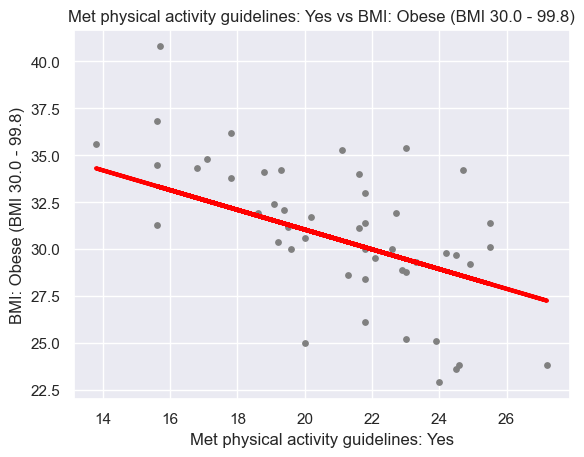

Met physical activity guidelines: Yes vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[-0.52615335]]
RMSE:  3.055
R2 score:  0.36 




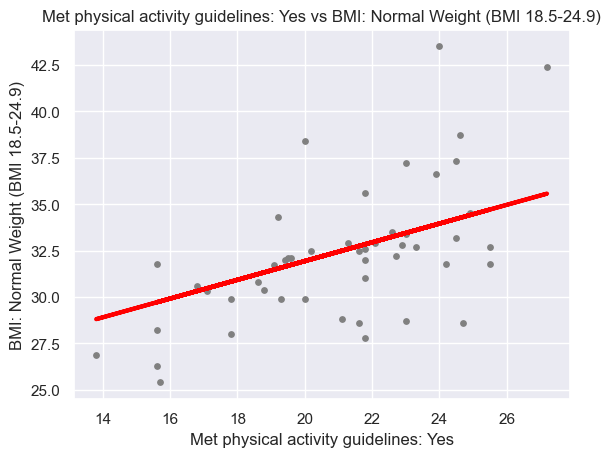

Met physical activity guidelines: Yes vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[0.50472657]]
RMSE:  3.031
R2 score:  0.323 




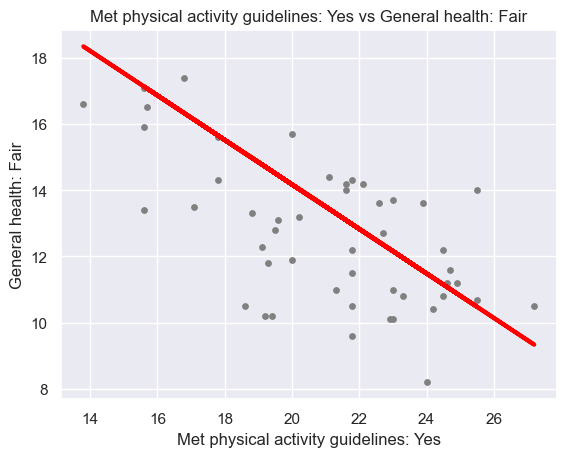

Met physical activity guidelines: Yes vs General health: Fair
Slope: [[-0.67200229]]
RMSE:  2.034
R2 score:  0.102 




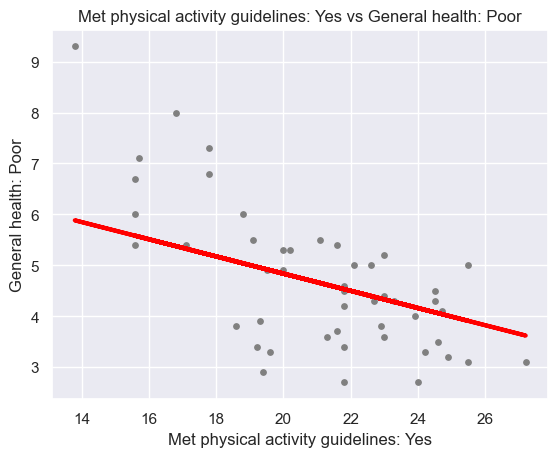

Met physical activity guidelines: Yes vs General health: Poor
Slope: [[-0.16895888]]
RMSE:  1.111
R2 score:  0.378 




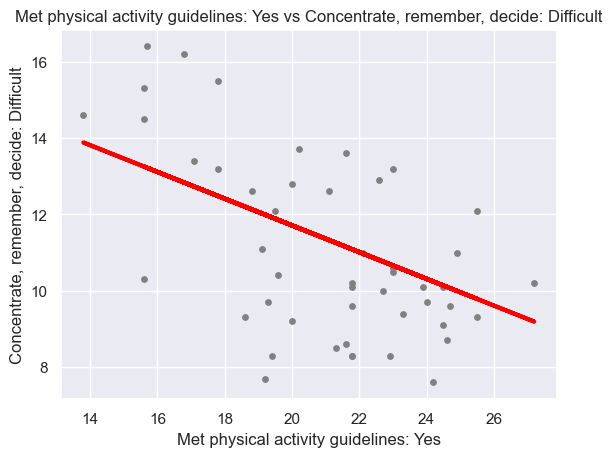

Met physical activity guidelines: Yes vs Concentrate, remember, decide: Difficult
Slope: [[-0.35014929]]
RMSE:  1.961
R2 score:  0.294 




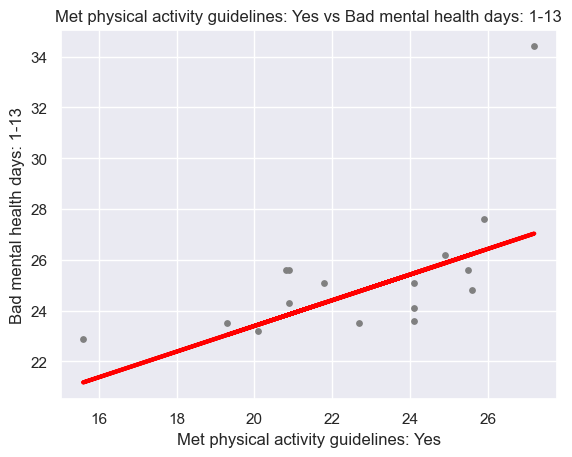

Met physical activity guidelines: Yes vs Bad mental health days: 1-13
Slope: [[0.50493205]]
RMSE:  2.175
R2 score:  0.321 




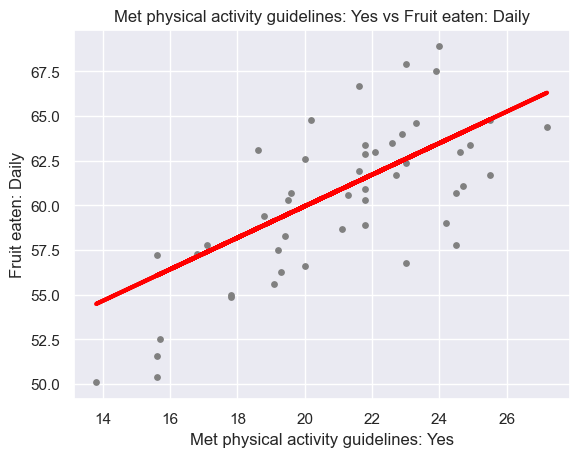

Met physical activity guidelines: Yes vs Fruit eaten: Daily
Slope: [[0.88201828]]
RMSE:  3.066
R2 score:  0.499 




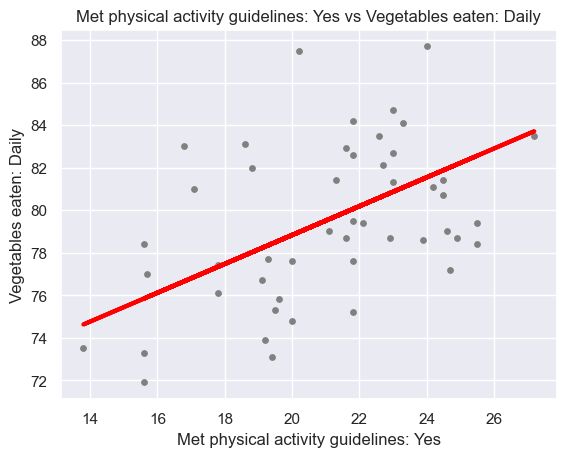

Met physical activity guidelines: Yes vs Vegetables eaten: Daily
Slope: [[0.67807149]]
RMSE:  3.295
R2 score:  0.195 




In [46]:
#Plotting linear regressions for this variable

var = 'Met physical activity guidelines: Yes'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
      Met physical activity guidelines: Yes vs Bad mental health days: 1-13 had a noticable outlier where Bad mental health days: 1-13 > 34. Dropping these outliers might yield a better linear regression.
   </div>

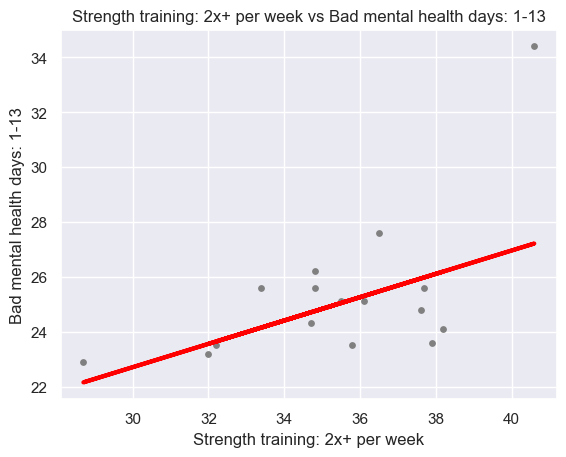

Strength training: 2x+ per week vs Bad mental health days: 1-13
Slope: [[0.42532489]]
RMSE:  2.19
R2 score:  0.312 




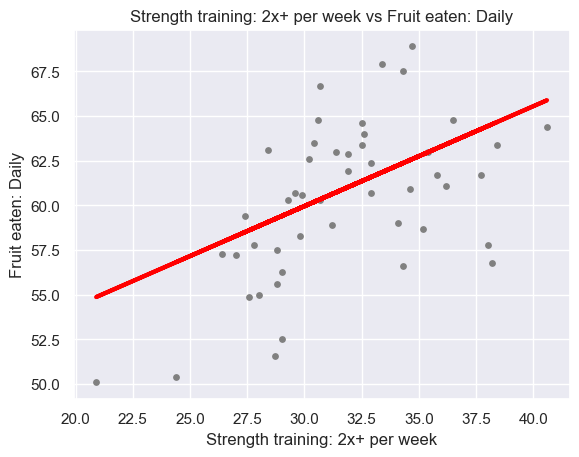

Strength training: 2x+ per week vs Fruit eaten: Daily
Slope: [[0.55907009]]
RMSE:  3.686
R2 score:  0.275 




In [43]:
#Plotting linear regressions for this variable

var = 'Strength training: 2x+ per week'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
      Strength training: 2x+ per week vs Bad mental health days: 1-13 had a noticable outlier where Bad mental health days: 1-13 > 34. Dropping these outliers might yield a better linear regression.
   </div>

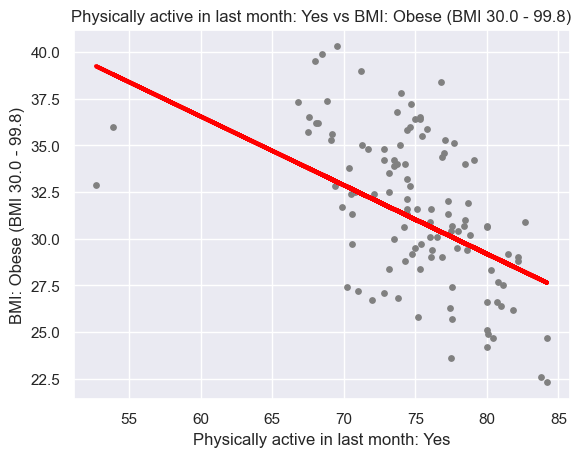

Physically active in last month: Yes vs BMI: Obese (BMI 30.0 - 99.8)
Slope: [[-0.36813015]]
RMSE:  3.447
R2 score:  0.277 




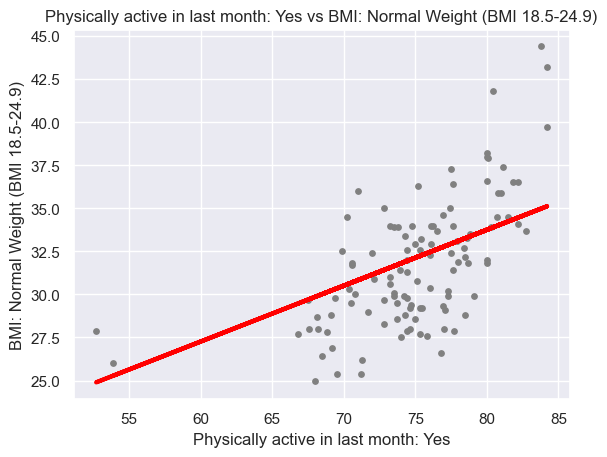

Physically active in last month: Yes vs BMI: Normal Weight (BMI 18.5-24.9)
Slope: [[0.32453521]]
RMSE:  3.005
R2 score:  0.345 




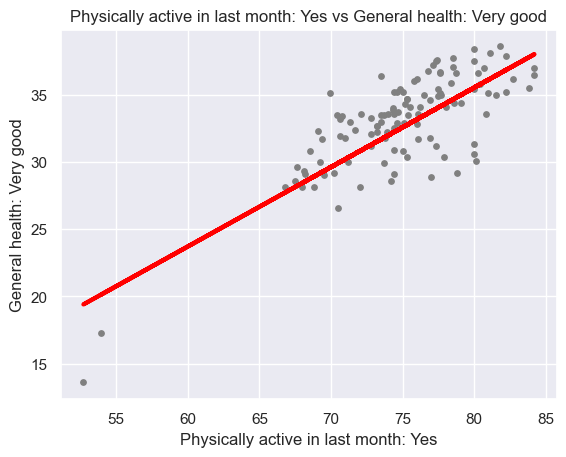

Physically active in last month: Yes vs General health: Very good
Slope: [[0.5908902]]
RMSE:  2.341
R2 score:  0.591 




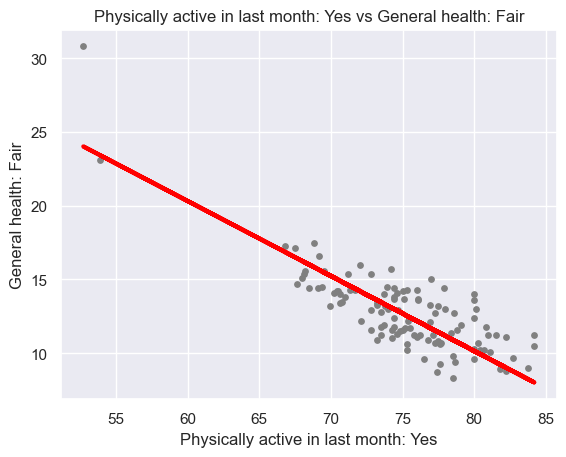

Physically active in last month: Yes vs General health: Fair
Slope: [[-0.50779639]]
RMSE:  1.651
R2 score:  0.657 




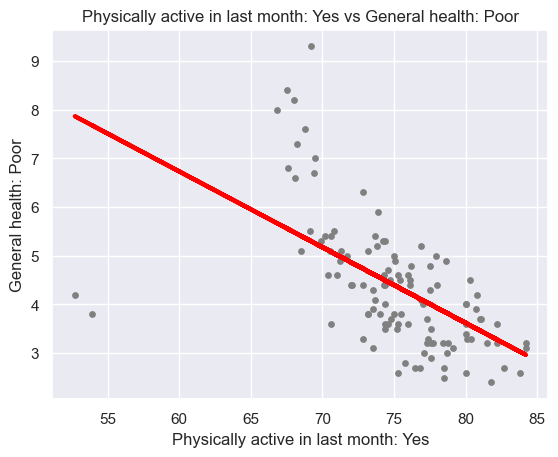

Physically active in last month: Yes vs General health: Poor
Slope: [[-0.15552205]]
RMSE:  1.099
R2 score:  0.325 




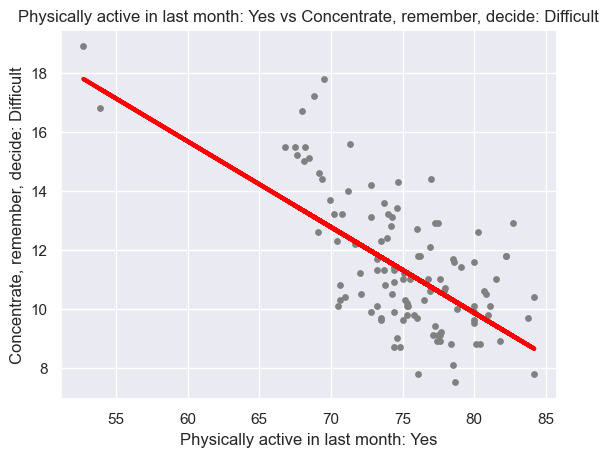

Physically active in last month: Yes vs Concentrate, remember, decide: Difficult
Slope: [[-0.29062296]]
RMSE:  1.714
R2 score:  0.445 




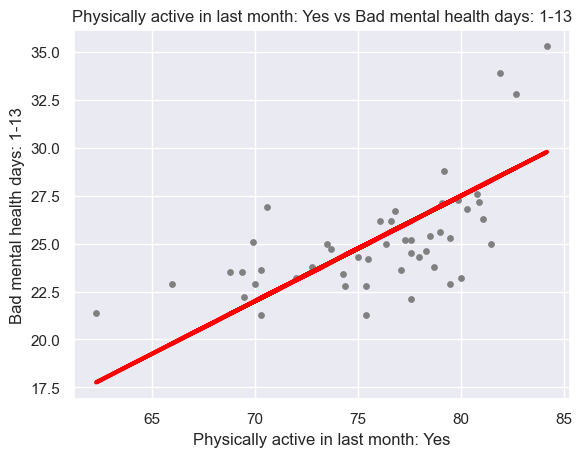

Physically active in last month: Yes vs Bad mental health days: 1-13
Slope: [[0.54948889]]
RMSE:  2.38
R2 score:  0.317 




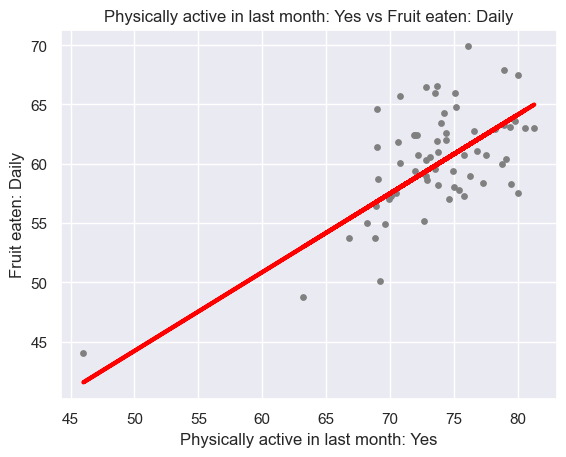

Physically active in last month: Yes vs Fruit eaten: Daily
Slope: [[0.66367363]]
RMSE:  3.561
R2 score:  0.376 




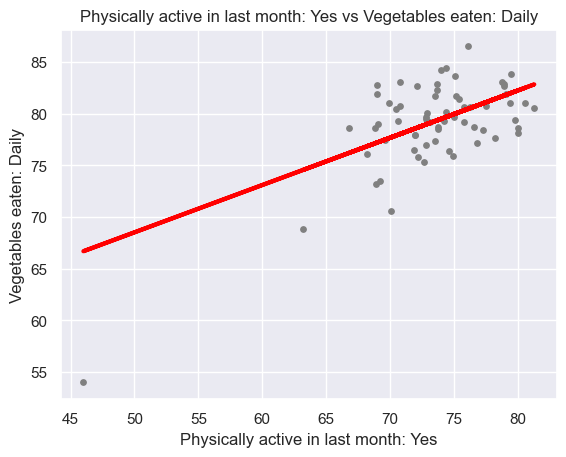

Physically active in last month: Yes vs Vegetables eaten: Daily
Slope: [[0.45723393]]
RMSE:  3.29
R2 score:  0.458 




In [44]:
#Plotting linear regressions for this variable

var = 'Physically active in last month: Yes'
y_list = []

for col in cat_corr.columns: # Populating a list of columns which correlate strongly or moderately with this variable.
    if corrs.at[var, col] is True:
        y_list.append(col)
        
reg_plot(var, y_list, 0)   # Plotting the list of strong and moderate correlations for this variable

<div class='alert alert-block alert-info'>
   <b>8 Physically active in last month: Yes variable pairs had noticable outliers where Physically active in last month: Yes < 55</b>. These records should be eaxmined more closely. Dropping these outliers might yield a better linear regression.
   </div>

<div class='alert alert-block alert-warning'>
    Possible refinement:<br><br>
    Physical activity had two outliers where:<br><br>
    <li><b>Bad mental health days: 1-13 > 34</b> in two variable pairs
    <li><b>Physically active in last month: Yes < 55</b> in eight variable pairs<br><br>
    These outlying records should be looked into.
   </div>

# 4. Conclusion

<div class='alert alert-block alert-warning'>
    <b>Summary</b><br><br>
    <li><b>Linear regressions did not model any of the strongly correlated variable pairs well.</b><br>
    <li>Some of the models may be improved based on the suggestions in the <b>possible refinement</b> sections.<br>
   </div>

<div class='alert alert-block alert-success'>
    <b>Next steps</b><br><br>
    <li>Evaluate strongly correlated pairs for cluster analyses.<br>
    <li>Remove outliers as suggested in possible refinement sections and re-run those regressions.<br>
   </div>

In [ ]:
# reset plot defaults

sns.reset_defaults()